<a href="https://colab.research.google.com/github/Yin039/AI_Models/blob/main/Data_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Project Background**

Tuberculosis (TB) remains one of the most significant public health challenges worldwide, especially in low- and middle-income countries. It is a communicable disease caused by the Mycobacterium tuberculosis bacterium and typically affects the lungs, although it can also impact other organs. Despite global efforts to control and eliminate TB, its incidence and mortality rates continue to raise concern in several regions, exacerbated by socio-economic factors, healthcare disparities, and lifestyle behaviors.

This project aims to analyze the determinants of tuberculosis outcomes, particularly the treatment success rate, among various countries between 2018 and 2022 using a real-world dataset. By leveraging data analytics techniques, we intend to identify the key factors influencing TB treatment outcomes and predict success rates across different nations. The dataset comprises multiple relevant indicators, including health expenditures, immunization coverage, lifestyle risk factors (such as tobacco and alcohol use), and demographic attributes.

The overall goal of this analysis is to uncover actionable insights through thorough data preprocessing, exploratory data analysis (EDA), and predictive modeling. Additionally, we compare the performance of linear regression and random forest models to evaluate their effectiveness in capturing patterns within the dataset. These insights can potentially assist policymakers, healthcare providers, and global health organizations in optimizing TB intervention strategies.

## **Pre-experiment Questions**
There are stakeholders such as parents, patients, healthcare workers, policymakers, and Non-Governmental Organization (NGO) involved in the TB prediction model. Therefore, the pre-experiment questions will be built based on the considerations of the selected stakeholders.

1.   **Parents: "Will my child’s risk of getting TB decrease if they receive the BCG immunization?"**

  Hypothesis: The higher the immunization rate, the lower the incidence of TB.

2.   **Public health officer: "Are rural populations at higher risk for TB?"**

  Hypothesis: The larger the rural population, the higher the incidence of TB.

3. **Ministry of Health: "Do areas with better TB management see lower TB incidence?"**

  Hypothesis: The stronger the TB management, the lower the TB incidence.

4. **Epidemiologist:
"Do lifestyles such as consuming tobacco and alcohol affect the TB incidence rate?"**

  Hypothesis: The person who consumes tobacco and alcohol has a higher risk of getting TB.

5. **NGO: "Which regions or demographic groups should we prioritize for TB awareness campaigns?"**

  Hypothesis: The higher the population of a country, the higher the priority of having TB awareness campaigns.

### Import libraries

In [ ]:
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

## 1. **Dataset Understanding**

The dataset are retrieved from the World Bank Group where the database used is Health Nutrition and Population Statistics.

The World Bank Group is an international financial institution that provides financial and technical assistance to developing countries around the world. It is a key source of global development data and research.

Database link: https://databank.worldbank.org/source/health-nutrition-and-population-statistics#

The Health Nutrition and Population Statistics dataset contains 474 features; however, only those data that were considered relevant to tuberculosis were selected.

The TB dataset contains of **16 features** with a total of **512 entries**. Below are the description of the features:

1.   **Country**

  Name of the country

2.   **Country Code**
  
  Code of the country

3.   **Year**
  
  Year of the data collected

4.   **Total Population**

  	The total population is based on the de facto definition of population, which counts all residents regardless of legal status or citizenship. The values shown are midyear estimates.

5. **Male Population**

  The male population is the count of the population that is male.

6. **Female Population**

  The female population is the count of the population that is female.

7. **Rural Population**
  
  Rural population refers to people living in rural areas as defined by national statistical offices. It is calculated as the difference between the total population and the urban population.

7. **Immunization BCG (%)**

  	The percentage of children ages 12-23 months who received vaccinations before 12 months or at any time before the survey for BCG. A child is considered adequately immunized after one dose.

8. **Tobacco Use (%)**

  The percentage of people aged 15 and over who use any form of tobacco daily or occasionally, excluding e-cigarettes and similar products, standardized to the WHO population.

9. **Tobacco Use Male (%)**

  The percentage of the male population aged 15 and over who use any form of tobacco daily or occasionally, excluding e-cigarettes and similar products, standardized to the WHO population.

10. **Tobacco Use Female (%)**

  The percentage of the female population aged 15 and over who use any form of tobacco daily or occasionally, excluding e-cigarettes and similar products, standardized to the WHO population.

11. **Alcohol Use (L, 15+ years old) - total alcohol consumption per capita of 15+ years old person estimated in litres of pure alcohol**

  The average amount of pure alcohol, from all sources, consumed by each person aged 15 and older in a year, adjusted for tourists.

12. **TB Incidence (per 100,000)**

  The number of new and relapse TB cases per 100,000 people in a year, including all TB forms and cases with HIV.

13. **TB Detection Rate (%)**

  The percentage of new and relapse TB cases reported to WHO compared to the estimated total number of TB cases in a given year.

14. **TB Treatment Success (%)**

  The percentage of new (and relapse) TB cases in a year that completed treatment successfully, either cured or treatment completed.

15. **TB Death Rate (%)**

  The estimated number of TB deaths among HIV-negative people per 100,000 population, updated regularly as new data and methods improve.

16. **Health Exp/Capita ($)**

  The estimation of current health expenditures includes healthcare goods and services consumed during each year.


The features above are collected from **103 countries** located in the regions of South Asia, Europe and Central Asia, and East Asia and the Pacific, and were selected for **5 years (2018-2022)**.

In [ ]:
# Read data from googleDrive folder
df = pd.read_csv('/content/drive/MyDrive/data.csv', encoding='latin-1')

# Eliminates last 3 rows of data, because it is the source of datasets which doesn't provide meaning
df = df.iloc[:-3]

# Print first five rows of dataset
df.head()

,Country Name,Country Code,Year,"Population, total","Population, male","Population, female",Rural population,"Immunization, BCG (% of one-year-old children)",Prevalence of current tobacco use (% of adults),"Prevalence of current tobacco use, males (% of male adults)","Prevalence of current tobacco use, females (% of female adults)","Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)","Incidence of tuberculosis (per 100,000 people)","Tuberculosis case detection rate (%, all forms)",Tuberculosis treatment success rate (% of new cases),"Tuberculosis death rate (per 100,000 people)",Current health expenditure per capita (current US$)
0,Afghanistan,AFG,2018 [YR2018],36743039.0,18564622,18178417,27375401.0,67.0,NaN,NaN,NaN,0.016,189.0,70.0,91.0,7.271,71.225090
1,Afghanistan,AFG,2019 [YR2019],37856121.0,19119647,18736474,28106656.0,65.0,NaN,NaN,NaN,0.016,189.0,73.0,91.0,7.064,74.064239
2,Afghanistan,AFG,2020 [YR2020],39068979.0,19725450,19343529,28900887.0,61.0,23.7,40.0,7.4,0.011,183.0,64.0,95.0,7.565,80.089233
3,Afghanistan,AFG,2021 [YR2021],40000412.0,20186456,19813956,29474704.0,55.0,23.2,39.3,7.1,NaN,185.0,68.0,93.0,8.002,81.521126
4,Afghanistan,AFG,2022 [YR2022],40578842.0,20475675,20103167,29778377.0,58.0,22.7,38.7,6.8,NaN,184.0,69.0,95.0,5.993,80.651604


Since the column names obtained from the database are complicated, we **renamed the names of each feature to a shorter form**.

In [ ]:
col_names = [
    'Country', 'Country Code', 'Year', 'Total Population',
    'Male Population', 'Female Population', 'Rural Population',
    'Immunization BCG (%)', 'Tobacco Use (%)', 'Tobacco Use Male (%)',
    'Tobacco Use Female (%)', 'Alcohol Use (L, 15+ years old)', 'TB Incidence (per 100,000)',
    'TB Detection Rate (%)', 'TB Treatment Success (%)', 'TB Death Rate (%)',
    'Health Exp/Capita ($)'
]

curr_col_names = list(df.columns)

map = {}
for i, name in enumerate(curr_col_names):
    map[name] = col_names[i]

df = df.rename(columns=map)

# Print the first 5 rows of the dataset to check the rename of each columns
df.head()

,Country,Country Code,Year,Total Population,Male Population,Female Population,Rural Population,Immunization BCG (%),Tobacco Use (%),Tobacco Use Male (%),Tobacco Use Female (%),"Alcohol Use (L, 15+ years old)","TB Incidence (per 100,000)",TB Detection Rate (%),TB Treatment Success (%),TB Death Rate (%),Health Exp/Capita ($)
0,Afghanistan,AFG,2018 [YR2018],36743039.0,18564622,18178417,27375401.0,67.0,NaN,NaN,NaN,0.016,189.0,70.0,91.0,7.271,71.225090
1,Afghanistan,AFG,2019 [YR2019],37856121.0,19119647,18736474,28106656.0,65.0,NaN,NaN,NaN,0.016,189.0,73.0,91.0,7.064,74.064239
2,Afghanistan,AFG,2020 [YR2020],39068979.0,19725450,19343529,28900887.0,61.0,23.7,40.0,7.4,0.011,183.0,64.0,95.0,7.565,80.089233
3,Afghanistan,AFG,2021 [YR2021],40000412.0,20186456,19813956,29474704.0,55.0,23.2,39.3,7.1,NaN,185.0,68.0,93.0,8.002,81.521126
4,Afghanistan,AFG,2022 [YR2022],40578842.0,20475675,20103167,29778377.0,58.0,22.7,38.7,6.8,NaN,184.0,69.0,95.0,5.993,80.651604


df.info() is used to print the information of the dataset.







In [ ]:
# Print the columns of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 512 entries, 0 to 511
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Country                         512 non-null    object 
 1   Country Code                    512 non-null    object 
 2   Year                            512 non-null    object 
 3   Total Population                512 non-null    float64
 4   Male Population                 512 non-null    int64  
 5   Female Population               512 non-null    int64  
 6   Rural Population                507 non-null    float64
 7   Immunization BCG (%)            416 non-null    float64
 8   Tobacco Use (%)                 246 non-null    float64
 9   Tobacco Use Male (%)            246 non-null    float64
 10  Tobacco Use Female (%)          246 non-null    float64
 11  Alcohol Use (L, 15+ years old)  250 non-null    float64
 12  TB Incidence (per 100,000)      482 

The dataset contains TB data collected from 103 countries for 5 years (2018-2022)

In [ ]:
country=df.groupby('Country')

print("Number of country:")
print(len(country))

Number of country:
103


## **2. Data Preprocessing**

### **2.1 Remove unnecessary information**
Since the "Country Code" and "Country" are the same which used to locate the country, therefore feature "Country Code" will be removed. The analysis will do based on the Country Name.

After removing, the number of features is 16.

In [ ]:
df.drop(['Country Code'], axis=1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 512 entries, 0 to 511
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Country                         512 non-null    object 
 1   Year                            512 non-null    object 
 2   Total Population                512 non-null    float64
 3   Male Population                 512 non-null    int64  
 4   Female Population               512 non-null    int64  
 5   Rural Population                507 non-null    float64
 6   Immunization BCG (%)            416 non-null    float64
 7   Tobacco Use (%)                 246 non-null    float64
 8   Tobacco Use Male (%)            246 non-null    float64
 9   Tobacco Use Female (%)          246 non-null    float64
 10  Alcohol Use (L, 15+ years old)  250 non-null    float64
 11  TB Incidence (per 100,000)      482 non-null    float64
 12  TB Detection Rate (%)           465 

### **2.2 Handle missing values**

In [ ]:
# Number of missing data for each features
df.isna().sum()

,0
Country,0
Year,0
Total Population,0
Male Population,0
Female Population,0
Rural Population,5
Immunization BCG (%),96
Tobacco Use (%),266
Tobacco Use Male (%),266
Tobacco Use Female (%),266


The features related to lifestyle, which are tobacco use and alcohol use, contain 266 missing values, which is approximately 51% of the total data entries. However, these features are needed to analyze how will these factors affect the TB management such as treatment succes rate and death rate. Therefore, the median will be used to fill in the missing values.

Two medians will be calculated and used:

1. For the country that is missing values for a certain year, the median will be calculated from the remaining years and used to fill in the missing year.
2. For the country that doesn't provide any information for the feature, a median of the feature for the whole dataset will be used to fill in the missing values.

In [ ]:
# Tobacco use: group median fallback to global median
for col in [
    'Tobacco Use (%)',
    'Tobacco Use Male (%)',
    'Tobacco Use Female (%)',
]:
    global_median = df[col].median()
    df[col] = df.groupby('Country')[col].transform(
        lambda x: x.fillna(x.median() if not x.median() != x.median() else global_median)
    )
    # Still fill any remaining NaNs with global median
    df[col] = df[col].fillna(global_median)

# Alcohol consumption: group median fallback to global median
col = 'Alcohol Use (L, 15+ years old)'
global_median = df[col].median()
df[col] = df.groupby('Country')[col].transform(
    lambda x: x.fillna(x.median() if not x.median() != x.median() else global_median)
)
df[col] = df[col].fillna(global_median)

Same median calculation methods are used to fill the missing values for the BCG immunization rate (96 missing values), TB incidence (30 missing values), detection case (47 missing values) and treatment success rate (82 missing values).

In [ ]:
# TB incidence: group median fallback to global median
for col in [
    'TB Incidence (per 100,000)',
    'TB Detection Rate (%)',
    'TB Treatment Success (%)',
    'Immunization BCG (%)',
]:
    global_median = df[col].median()
    df[col] = df.groupby('Country')[col].transform(
        lambda x: x.fillna(x.median() if not x.median() != x.median() else global_median)
    )
    # Still fill any remaining NaNs with global median (failsafe)
    df[col] = df[col].fillna(global_median)

Interpolation is used to handle the missing values of features related to population and health expenditure. It is because
1. the number of missing values for population and health expenditure is small
2. population and health expenditure will change gradually over time where the neightbouring years' values will likely similar

Therefore, interpolation is used to estimate the value of missing values based on the surrounding trends and patterns

In [ ]:
# Interpolate Rural population (small missing count)
df['Rural Population'] = df['Rural Population'].interpolate(limit_direction='both')

# Interpolate health expenditure
df['Health Exp/Capita ($)'] = df['Health Exp/Capita ($)'].interpolate(limit_direction='both')


In [ ]:
# Print number of missing values after handling the missing values
df.isna().sum()

,0
Country,0
Year,0
Total Population,0
Male Population,0
Female Population,0
Rural Population,0
Immunization BCG (%),0
Tobacco Use (%),0
Tobacco Use Male (%),0
Tobacco Use Female (%),0


## **3. Exploratory Data Analysis (EDA)**

4 analysis are done below:
1. Statistical Analysis
2. Correlation Heatmap
3. Outlier and Anomalies Analysis
4. Segmentation Analysis (Here are the analysis to answer the pre-experiment questions)

### **1. Statistical Analysis**

**Insights from analysis of each feature**

*   **Population metrics show high variability.**
  
  Due to the population of the country is recorded by counting the number of persons instead of percentage, it tends to have a large variance (high standard deviation and wide range).

  However, large variance will overshadow features with smaller scales potentially bias predictions

*   **Immunization coverage is generally high, but for countries with 0% there is a risk of recording errors.**

  The mean BCG immunization rate was 90.25% and the median (50th percentile) was 93%, indicating that most countries had high coverage, but some had very low coverage (minimum = 0%) which was most likely due to missing or erroneous records.

*   **Gender gap in tobacco use**

  The average tobacco use rate was higher among males (mean = 37.16%) than females (mean = 15.81%), indicating gender differences in tobacco consumption.

  However, since 51% of tobacco use data are missing, most data are based on national or global median estimates. Therefore, more real data or samples from more years or more countries are needed to enhance the accuracy of this feature.

***
**Summary**
* **Presence of Outliers**

  The large gaps between max values and upper percentiles in population, TB Incidence, and expenditure columns suggest the presence of outliers.

* **Global Inequality**

  The 25th, 50th, and 75th percentiles for most features such as rate of tobacco use (male), TB incidence, TD death rate, and health expenditure are much lower than the maximum, emphasizing global disparities in health, population, and economic indicators.

* **Data Incompleteness**

  Some features such as rate of BCG immunization, rate of tobacco use (female), alcohol use, TB incidence and treatment success rate have minimum values of 0, which may indicate missing data or countries without programs, warranting further investigation.

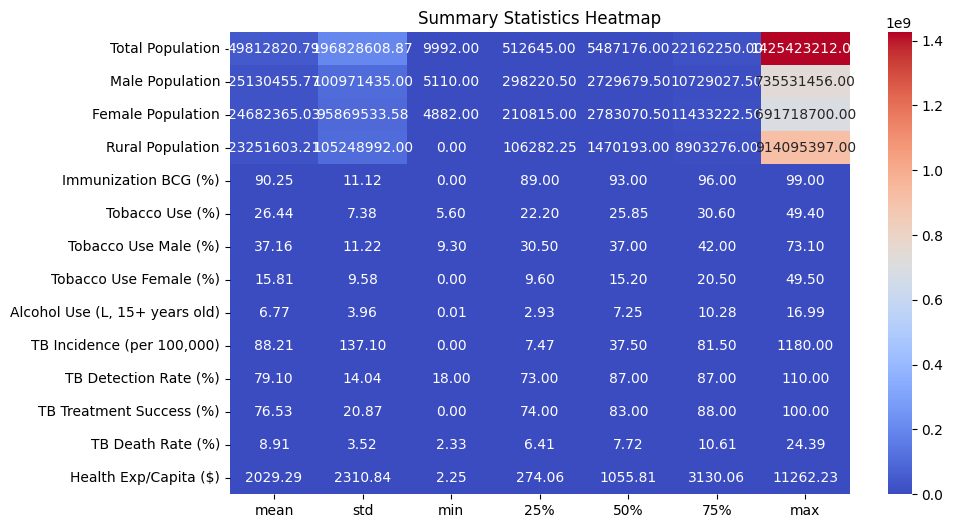

In [ ]:
desc = df.describe().T
plt.figure(figsize=(10, 6))
sns.heatmap(desc[['mean', 'std', 'min', '25%', '50%', '75%', 'max']], annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Summary Statistics Heatmap')
plt.show()

#### **1.1 Univariate Analysis**
Since there are 103 countries in the dataset, therefore only the top 10 countries with the largest total population will be used for the analysis purpose.

Before the selection of the 10 top countries with the largest population, the dataset is grouped by 'Country' and calculate the mean of the 'Total Population'.

From the bar chart below, among the 10 countries selected, it shows that China (34.8%) and India (34.6%) are the countries with largest population while Turkiye (2.1%) has the smallest population.

(np.float64(-1.0999986756653655),
 np.float64(1.099999936936446),
 np.float64(-1.1000000061859299),
 np.float64(1.099999706527945))

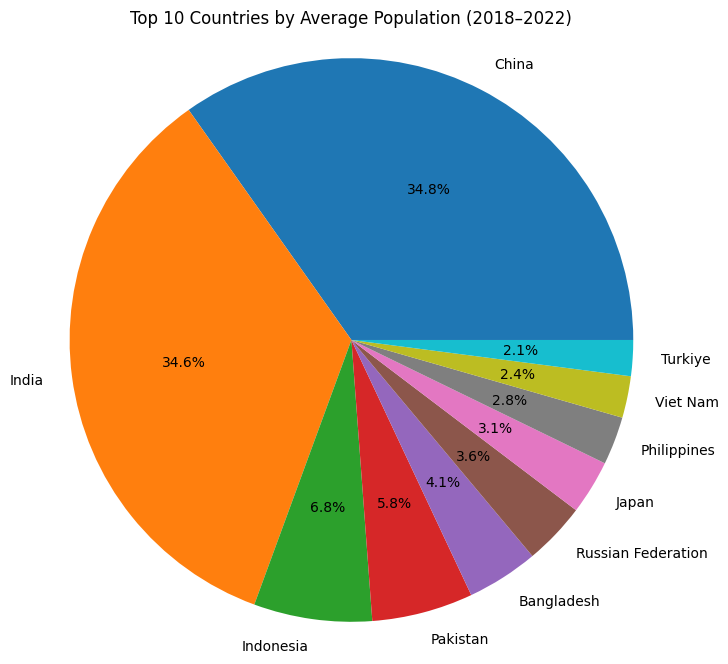

In [ ]:
# Convert the 'Year' column to string type before using .str accessor
df['Year_clean'] = df['Year'].astype(str).str.extract(r'(\d{4})').astype(int)

# Group by Country and calculate average population
avg_pop = df.groupby('Country')['Total Population'].mean().reset_index()

# Sort and get top 10 countries by average population
top10 = avg_pop.nlargest(10, 'Total Population')

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(top10['Total Population'], labels=top10['Country'], autopct='%1.1f%%')
plt.title('Top 10 Countries by Average Population (2018–2022)')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is a circle

From the 10 countries with largest population, a graph bar related to the TB management (Incidence, Detection Case, Treatment Success Rate, Death Rate) are plotted.

* *TB Incidence*

  Highest: Philippines

  Lowest: Japan, Russian Federation, Turkiye

* *TB Detection Rate*

  Highest: Japan, Russian Federation

  Lowest: Bangladesh, Indonesia, and Pakistan

* *TB Success Rate*

  Highest: Viet Nam, China

  Lowest: Japan, Russian Federation

* *TB Death Rate*

  Highest: Philippines, Indonesia, Bangladesh

  Lowest: Japan, Russian Federation, and Turkiye

* *BCG immunization*

  Highest: China, Bangladesh, and Turkiye

  Lowest: Russian Federation and Japan

***
**Correlation Insights**
* Countries with high BCG immunization rates tend to have lower TB incidence and death rates, although there are exceptions such as Philippines.

* High TB incidence does not always correspond to low detection or treatment success rates.

* Generally, the higher the detection and treatment success rates, the lower the TB death rates.


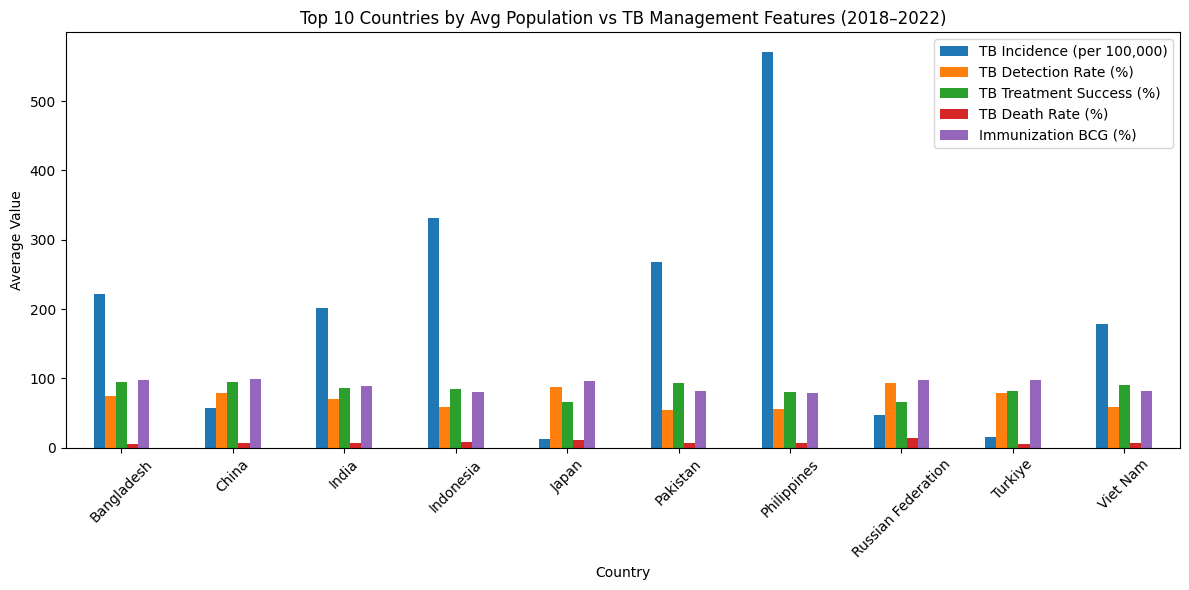

In [ ]:
# Filter data for only the top 5 countries
df_top10 = df[df['Country'].isin(top10['Country'])]

# Clean year format
df_top10['Year'] = df_top10['Year'].str.extract(r'(\d{4})')
df_top10['Year'] = df_top10['Year'].astype(int)

# List the features that involved in the TB management
features_TB_management = [
    'TB Incidence (per 100,000)',
    'TB Detection Rate (%)',
    'TB Treatment Success (%)',
    'TB Death Rate (%)',
    'Immunization BCG (%)'
]

# Group by Country and calculate the mean for each TB management features
avg_features_TB_management = df_top10.groupby('Country')[features_TB_management].mean()

# Plot: Grouped bar chart
avg_features_TB_management.plot(kind='bar', figsize=(12, 6))
plt.title('Top 10 Countries by Avg Population vs TB Management Features (2018–2022)')
plt.ylabel('Average Value')
plt.xlabel('Country')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

From the 10 countries with largest population, a graph bar related to the tobacco and alcohol uses are plotted.

* *Tobacco Use*

  Highest: Bangladesh, Indonesia, and Turkiye

  Lowest: Japan and Pakistan

* *Alcohol Use*

  Highest: Russian Federation, Turkiye, and Viet Nam

  Lowest: Indonesia and Pakistan

***
**Correlation Insight**

* It is significant that in each country, the proportion of male tobacco users is much higher than the overall proportion and the proportion of females. However, this analysis needs further validation because about 51% of the data related to tobacco and alcohol use were missing in the original dataset. The current analysis was performed by filling in the median (whether calculated on a contry or global basis) after handling the missing values.

* Alcohol consumption tends to be low in countries with predominantly Muslim populations such as Indonesia, Pakistan, and Bangladesh, reflecting religious and cultural norms.

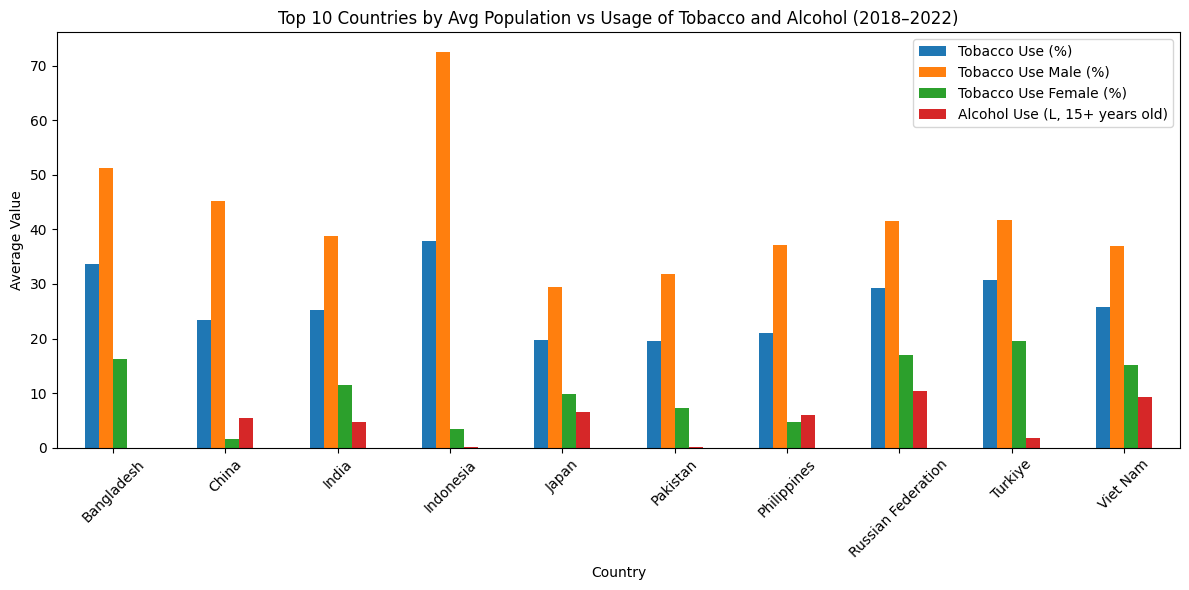

In [ ]:
# Filter data for only the top 5 countries
df_top10 = df[df['Country'].isin(top10['Country'])]

# List the features that involved in the TB management
features_lifestyles = [
    'Tobacco Use (%)',
    'Tobacco Use Male (%)',
    'Tobacco Use Female (%)',
    'Alcohol Use (L, 15+ years old)'
]

# Group by Country and calculate the mean for each lifestyles factors
avg_features_lifestyles = df_top10.groupby('Country')[features_lifestyles].mean()

# Plot: Grouped bar chart
avg_features_lifestyles.plot(kind='bar', figsize=(12, 6))
plt.title('Top 10 Countries by Avg Population vs Usage of Tobacco and Alcohol (2018–2022)')
plt.ylabel('Average Value')
plt.xlabel('Country')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### **1.2 Bivariate Analysis**
Only the top 10 countries with the largest total population will be used for the bivariate analysis.

##### **1.2.1 Health outcome analysis**
1. *TB Incidence vs. BCG Immunization*

  In most countries with a low TB incidence rate (less than 400 per 100,000 population), the BCG vaccination rate can reach over 80%.

  **Interesting Finding**
  
  The Philippines is a special case where its rate of immunization is greater than 80%, however, the TB incidence is still high (more than 500 per 100,000 population).

  Philippines and Indonesia have a similar low rate of BCG immunization, which is lower than 70% at a point. It can be predicted that these data are missing and filled with a global median.

2. *TB Treatment Success Rate vs TB Death Rate*

  Most of the data is concentrated in the lower right corner of the graph, showing that countries with treatment success rates above 75% have lower TB death rates, below 10%.

  **Interesting Finding**
  
  Russian Federation and Japan shows the negative effects with TB death rates exceeding 10% and treatment success rates below 70%. The most likely reason for this is that the population structure in these countries is older, which reduces the success rate of treatment. However, this hypothesis needs to be verified.

###### TB Incidence vs. BCG Immunization

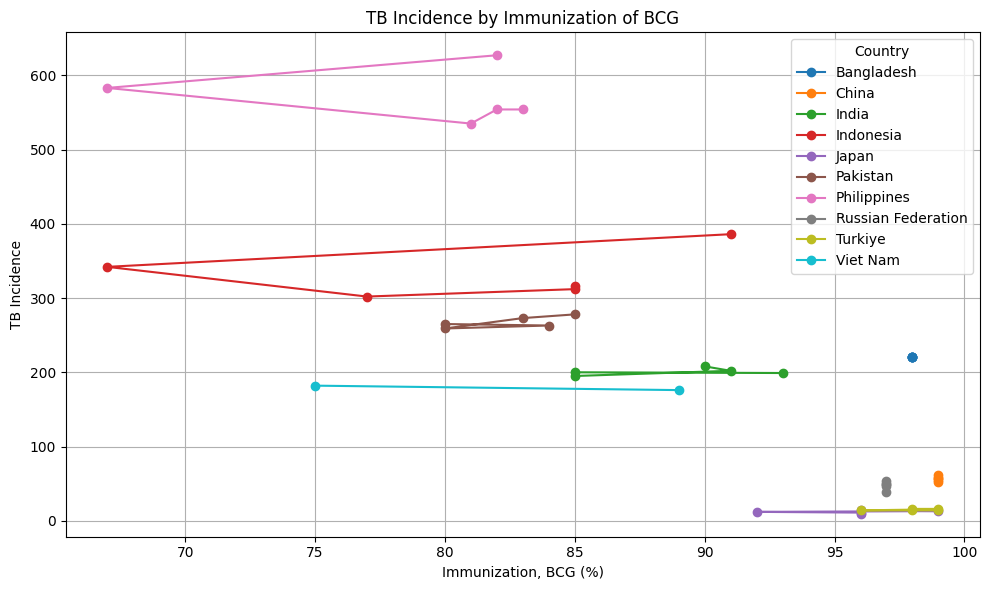

In [ ]:
# Filter relevant metrics
metrics = ['Immunization BCG (%)', 'TB Incidence (per 100,000)']

# Plot
plt.figure(figsize=(10, 6))

for country in df_top10['Country'].unique():
    country_data = df_top10[df_top10['Country'] == country]
    plt.plot(
        country_data['Immunization BCG (%)'],
        country_data['TB Incidence (per 100,000)'],
        marker='o',
        label=country
    )

plt.title('TB Incidence by Immunization of BCG')
plt.xlabel('Immunization, BCG (%)')
plt.ylabel('TB Incidence')
plt.legend(title='Country')
plt.grid(True)
plt.tight_layout()
plt.show()

###### TB Treatment Success Rate vs TB Death Rate

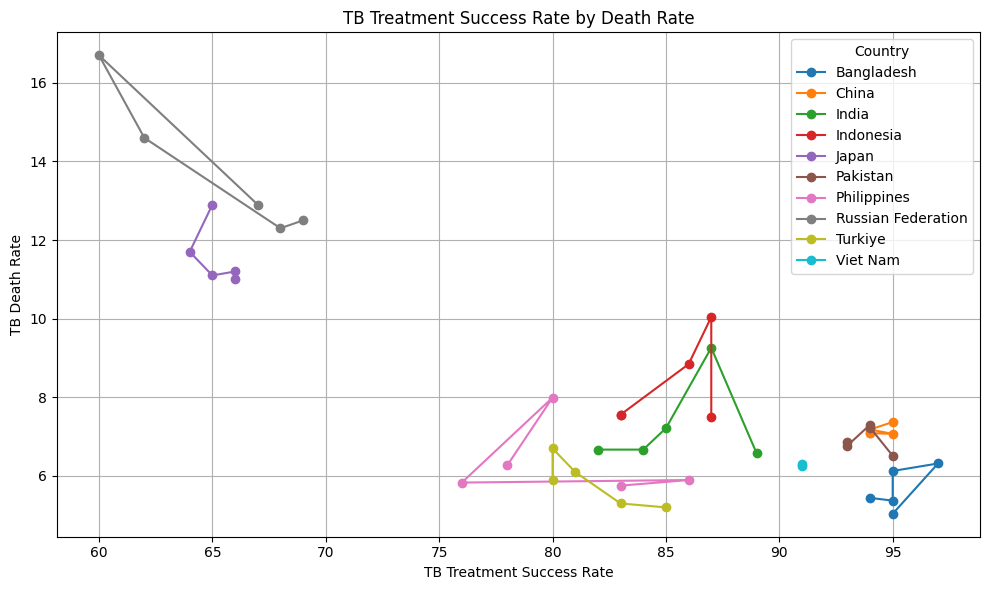

In [ ]:
# Plot
plt.figure(figsize=(10, 6))

for country in df_top10['Country'].unique():
    country_data = df_top10[df_top10['Country'] == country]
    plt.plot(
        country_data['TB Treatment Success (%)'],
        country_data['TB Death Rate (%)'],
        marker='o',
        label=country
    )

plt.title('TB Treatment Success Rate by Death Rate')
plt.xlabel('TB Treatment Success Rate')
plt.ylabel('TB Death Rate')
plt.legend(title='Country')
plt.grid(True)
plt.tight_layout()
plt.show()

##### **1.2.2 Lifestyle factors**
1. *Alcohol Consumption vs. TB Management*

  The relationship between alcohol consumption and TB treatment success and death showed a clear regularity. In most countries, areas with lower alcohol consumption had higher TB treatment success and lower death. However, there is no pattern of relationship between alcohol consumption and TB incidence observed where the data distribution is inconsistent.
   
  The negative effect of alcohol consumption on the TB management was particularly evident in the Russian Federation, a country with the highest overall alcohol consumption and the lowest TB treatment success rate, and the highest mortality rate.

2. *TB Treatment Success Rate vs. Tobacco Use*

  There is no obvious relationship between tobacco use rate and TB treatment success rate among females, and the data distribution is inconsistent; while the higher the tobacco use rate among males, the lower the TB treatment success rate.

  **Interesting Finding**
  
  The relationship between the tobacco use rate among males and the TB treatment success rate is not practical, as smoking does affect the TB treatment. It may be caused by the incompleteness and loss of values of our datasets, which have approximately 51% missing values in the features of tobacco use, therefore, several methods are needed to enhance the data accuracy:

  1. get a longer period of data
  2. obtain data from other countries

###### Alcohol Consumption vs. TB Management

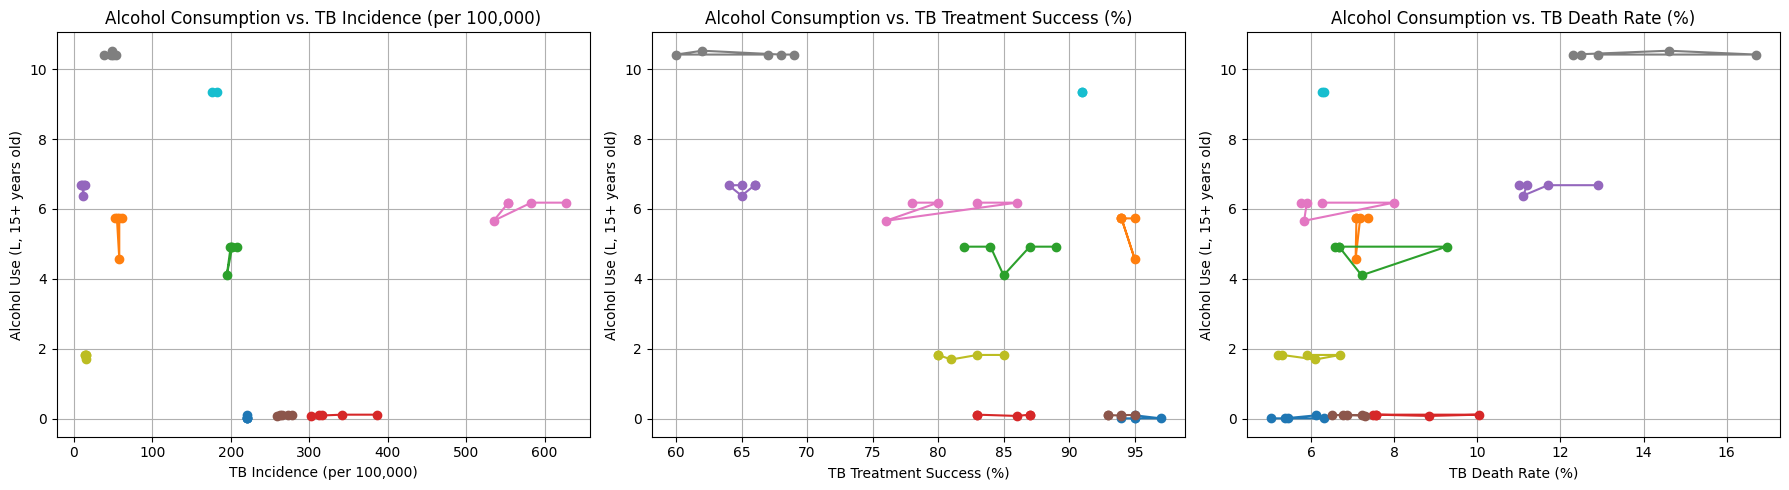

In [ ]:
TB_management_col = [
    'TB Incidence (per 100,000)',
    'TB Treatment Success (%)',
    'TB Death Rate (%)',
]

alcohol_col = 'Alcohol Use (L, 15+ years old)'

plt.figure(figsize=(18, 5))

for i, tb_col in enumerate(TB_management_col, start=1):
  ax = plt.subplot(1, 3, i)

  for country in df_top10['Country'].unique():
    country_data = df_top10[df_top10['Country'] == country]
    plt.plot(
        country_data[tb_col],
        country_data[alcohol_col],
        marker='o',
        label=country
        )

  ax.set_title(f'Alcohol Consumption vs. {tb_col}', fontsize=12)
  ax.set_xlabel(tb_col, fontsize=10)
  ax.set_ylabel(alcohol_col, fontsize=10)
  ax.grid(True)

plt.tight_layout()
plt.show()

###### TB Incidence vs. Tobacco use

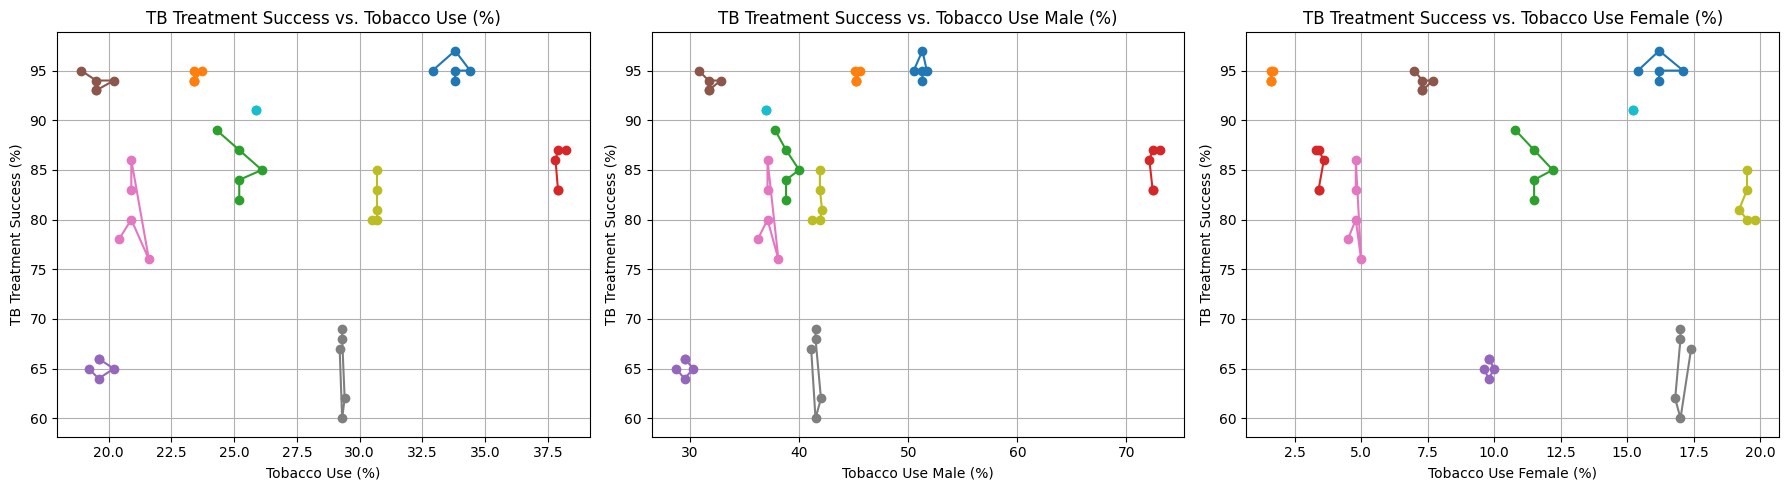

In [ ]:
# Define the three “tobacco‐use” columns and the TB incidence column
tobacco_cols = [
    'Tobacco Use (%)',
    'Tobacco Use Male (%)',
    'Tobacco Use Female (%)',
]

tb_incidence_col = 'TB Treatment Success (%)'

plt.figure(figsize=(18, 5))

for i, tob_col in enumerate(tobacco_cols, start=1):
  ax = plt.subplot(1, 3, i)

  for country in df_top10['Country'].unique():
    country_data = df_top10[df_top10['Country'] == country]
    plt.plot(
        country_data[tob_col],
        country_data[tb_incidence_col],
        marker='o',
        label=country
        )

  ax.set_title(f'TB Treatment Success vs. {tob_col}', fontsize=12)
  ax.set_xlabel(tob_col, fontsize=10)
  ax.set_ylabel(tb_incidence_col, fontsize=10)
  ax.grid(True)

plt.tight_layout()
plt.show()

##### **1.2.3 Health expenditure analysis**

*TB Management vs. Healthcare Expenditure*


Japan is a positive example that fully illustrates the importance of increasing health expenditure for better TB management. In contrast, Russian Federations shows the negative impact of poorer TB management with lower healthcare expenditure.

**Interesting Findings**

Most of the country will have low health expenditure and achieve a relatively high treatment success rate and a relatively low death rate. It may be caused by the TB management rate is highly affected by the population size and structure of a country, which is less related to the healthcare expenditure.

TB Management vs Healthcare Expenditure

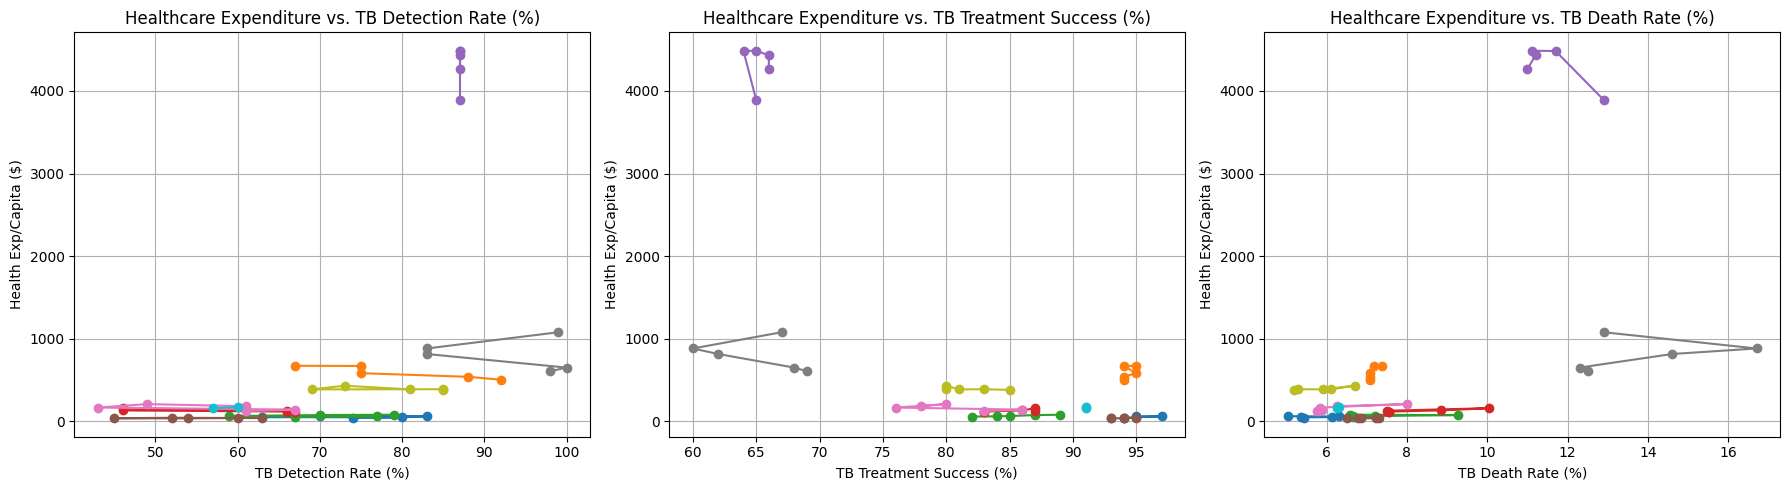

In [ ]:
# Define the TB_management columns and expenditure columns
TB_management = [
    'TB Detection Rate (%)',
    'TB Treatment Success (%)',
    'TB Death Rate (%)',
]

expenditure = 'Health Exp/Capita ($)'

plt.figure(figsize=(18, 5))

for i, tb_col in enumerate(TB_management, start=1):
  ax = plt.subplot(1, 3, i)

  for country in df_top10['Country'].unique():
    country_data = df_top10[df_top10['Country'] == country]
    plt.plot(
        country_data[tb_col],
        country_data[expenditure],
        marker='o',
        label=country
        )

  ax.set_title(f'Healthcare Expenditure vs. {tb_col}', fontsize=12)
  ax.set_xlabel(tb_col, fontsize=10)
  ax.set_ylabel(expenditure, fontsize=10)
  ax.grid(True)

plt.tight_layout()
plt.show()

### **2. Correlation Heatmap**

* Strong positive correlations among population features where Total Population, Male Population, Female Population, and Rural Population are all extremely highly correlated with correlation coefficients close to 1.

* TB Incidence is moderately positively correlated with Tobacco Use Male (%) (0.49) and negatively correlated with TB Detection Rate (-0.49), TB Treatment Success (-0.22), and Health Expenditure (-0.43). It shows that

   * the higher the male tobacco use may lead to higher TB incidence.
  
  * the higher the rate of TB detection and treatment success may lead to lower TB incidence.

  * the higher the health expenditure may lead to lower TB incidence

* Rate of BCG immunization BCG has a moderate negative correlation with TB Incidence (-0.35) shows that the higher the immunization rates may lead to lower TB incidence.

* TB death rate is moderately correlated with TB Incidence (0.40) and Tobacco Use Female (%) (0.39) shows that the higher the TB incidence and female tobacco use may lead to higher death rate.

***
**Summary**

* Increasing the health expenditure will improve the TB detection and treatment success rates.

* The BCG immunization provides a good control to decrease the TB incidence

* TB incidence and tobacco use show a positive correlation, therefore, gender-specific interventions may be needed due to differences in smoking and drinking habits.

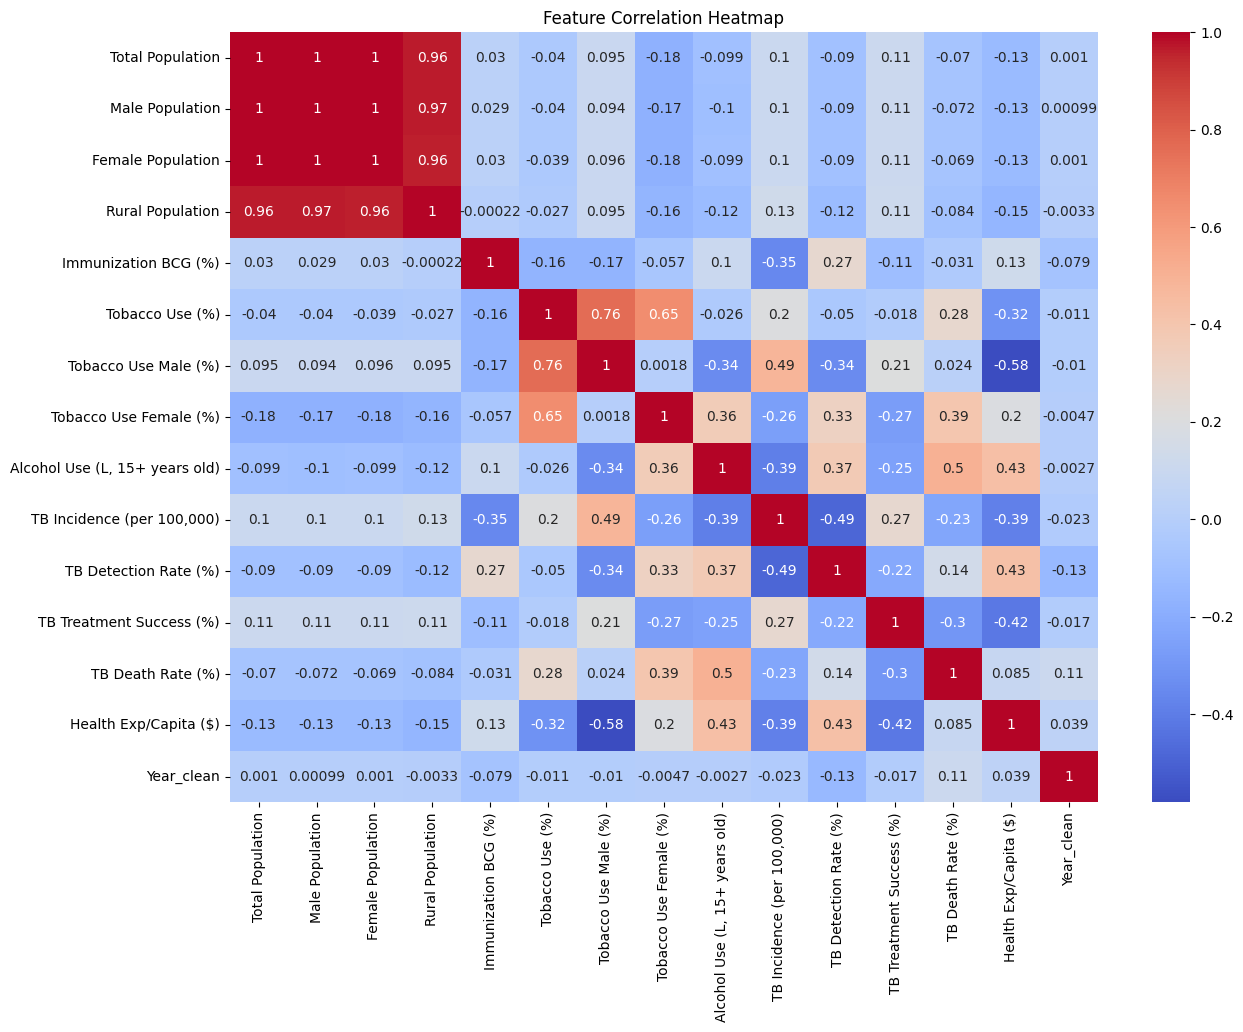

In [ ]:
# Correlation heatmap
plt.figure(figsize=(14,10))
numeric_df = df.select_dtypes(include=['float64', 'int64'])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

### **3. Outlier and Anomalies Analysis**
Each feature is plotted using boxplot before and after outlier removal. A comparison between the distribution of the data values before and after outlier removal is done. Then anomaly analysis is done on the data after the outliers are removed using IQR methods.

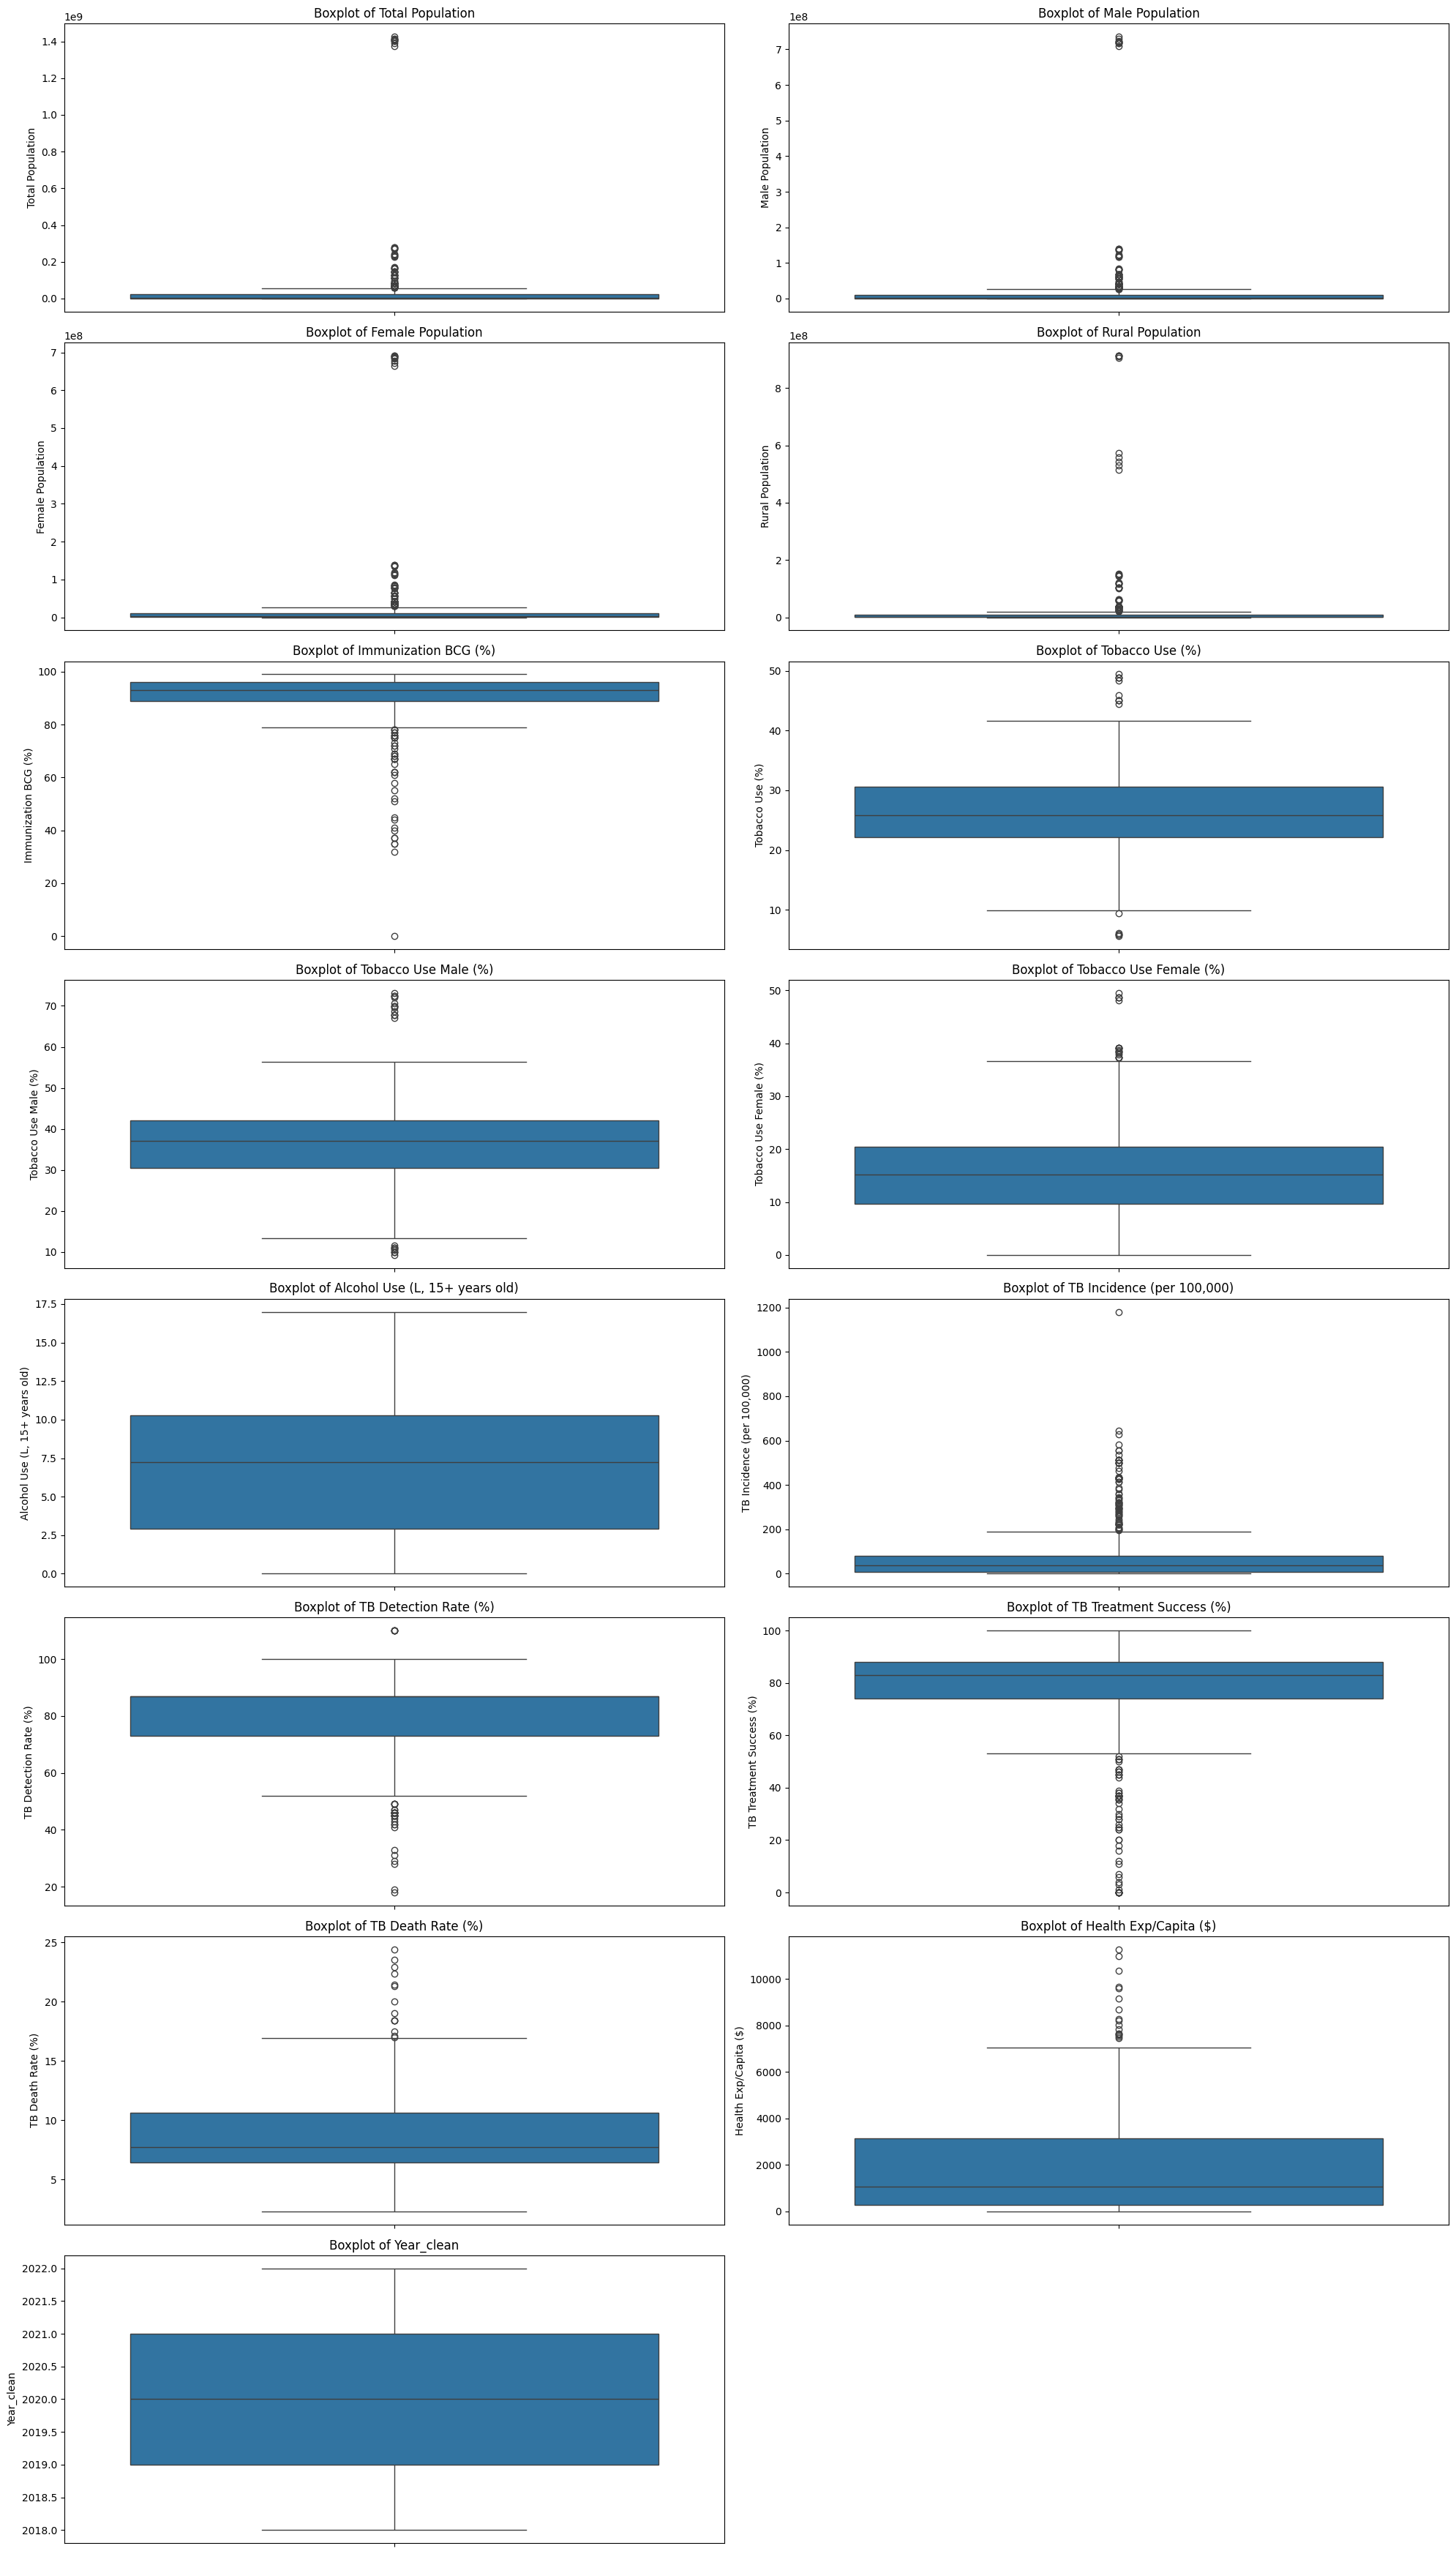

In [ ]:
# Visualize the presence of outliers
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(20, 35))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(8, 2, i)
    sns.boxplot(data=df, y=col)
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

The boxplot for each features are shown after the outliers are removed using IQR method. Here are the analysis made after the outlier removal:

* *Population*

  The extreme outliers representing very large populations such as China and India have been removed to enable a better analysis of patterns among countries with similar population scales.

* *Rate of BCG immunization*

  Statistical analysis shows that the BCG vaccination rate in some country is 0%, which may be underreported. After excluding areas with extremely low vaccination rates, the typical immunization coverage rate in most country can be more clearly reflected.

* *Tobacco use*

  Extreme values ​​of tobacco use for both males and females have been removed. The distribution now focuses on more common tobacco use patterns.

* *Health expenditure*

  Countries with extremely high spending that exceeds 10000 $ have been removed. Now the data better reflects typical health spending patterns around the world, which are in reasonable bounds and are useful for policy planning.

***
**Recommendation**
* **Unrealistic rate of TB detection and treatment success**

  There is an anomaly in the rate of detection and treatment success even after outlier removal, with approximately 100%, which is unrealistic and impossible to achieve in real life. Therefore, further verification is needed to ensure that it the achievable. The data can only be kept if it is verified as real.

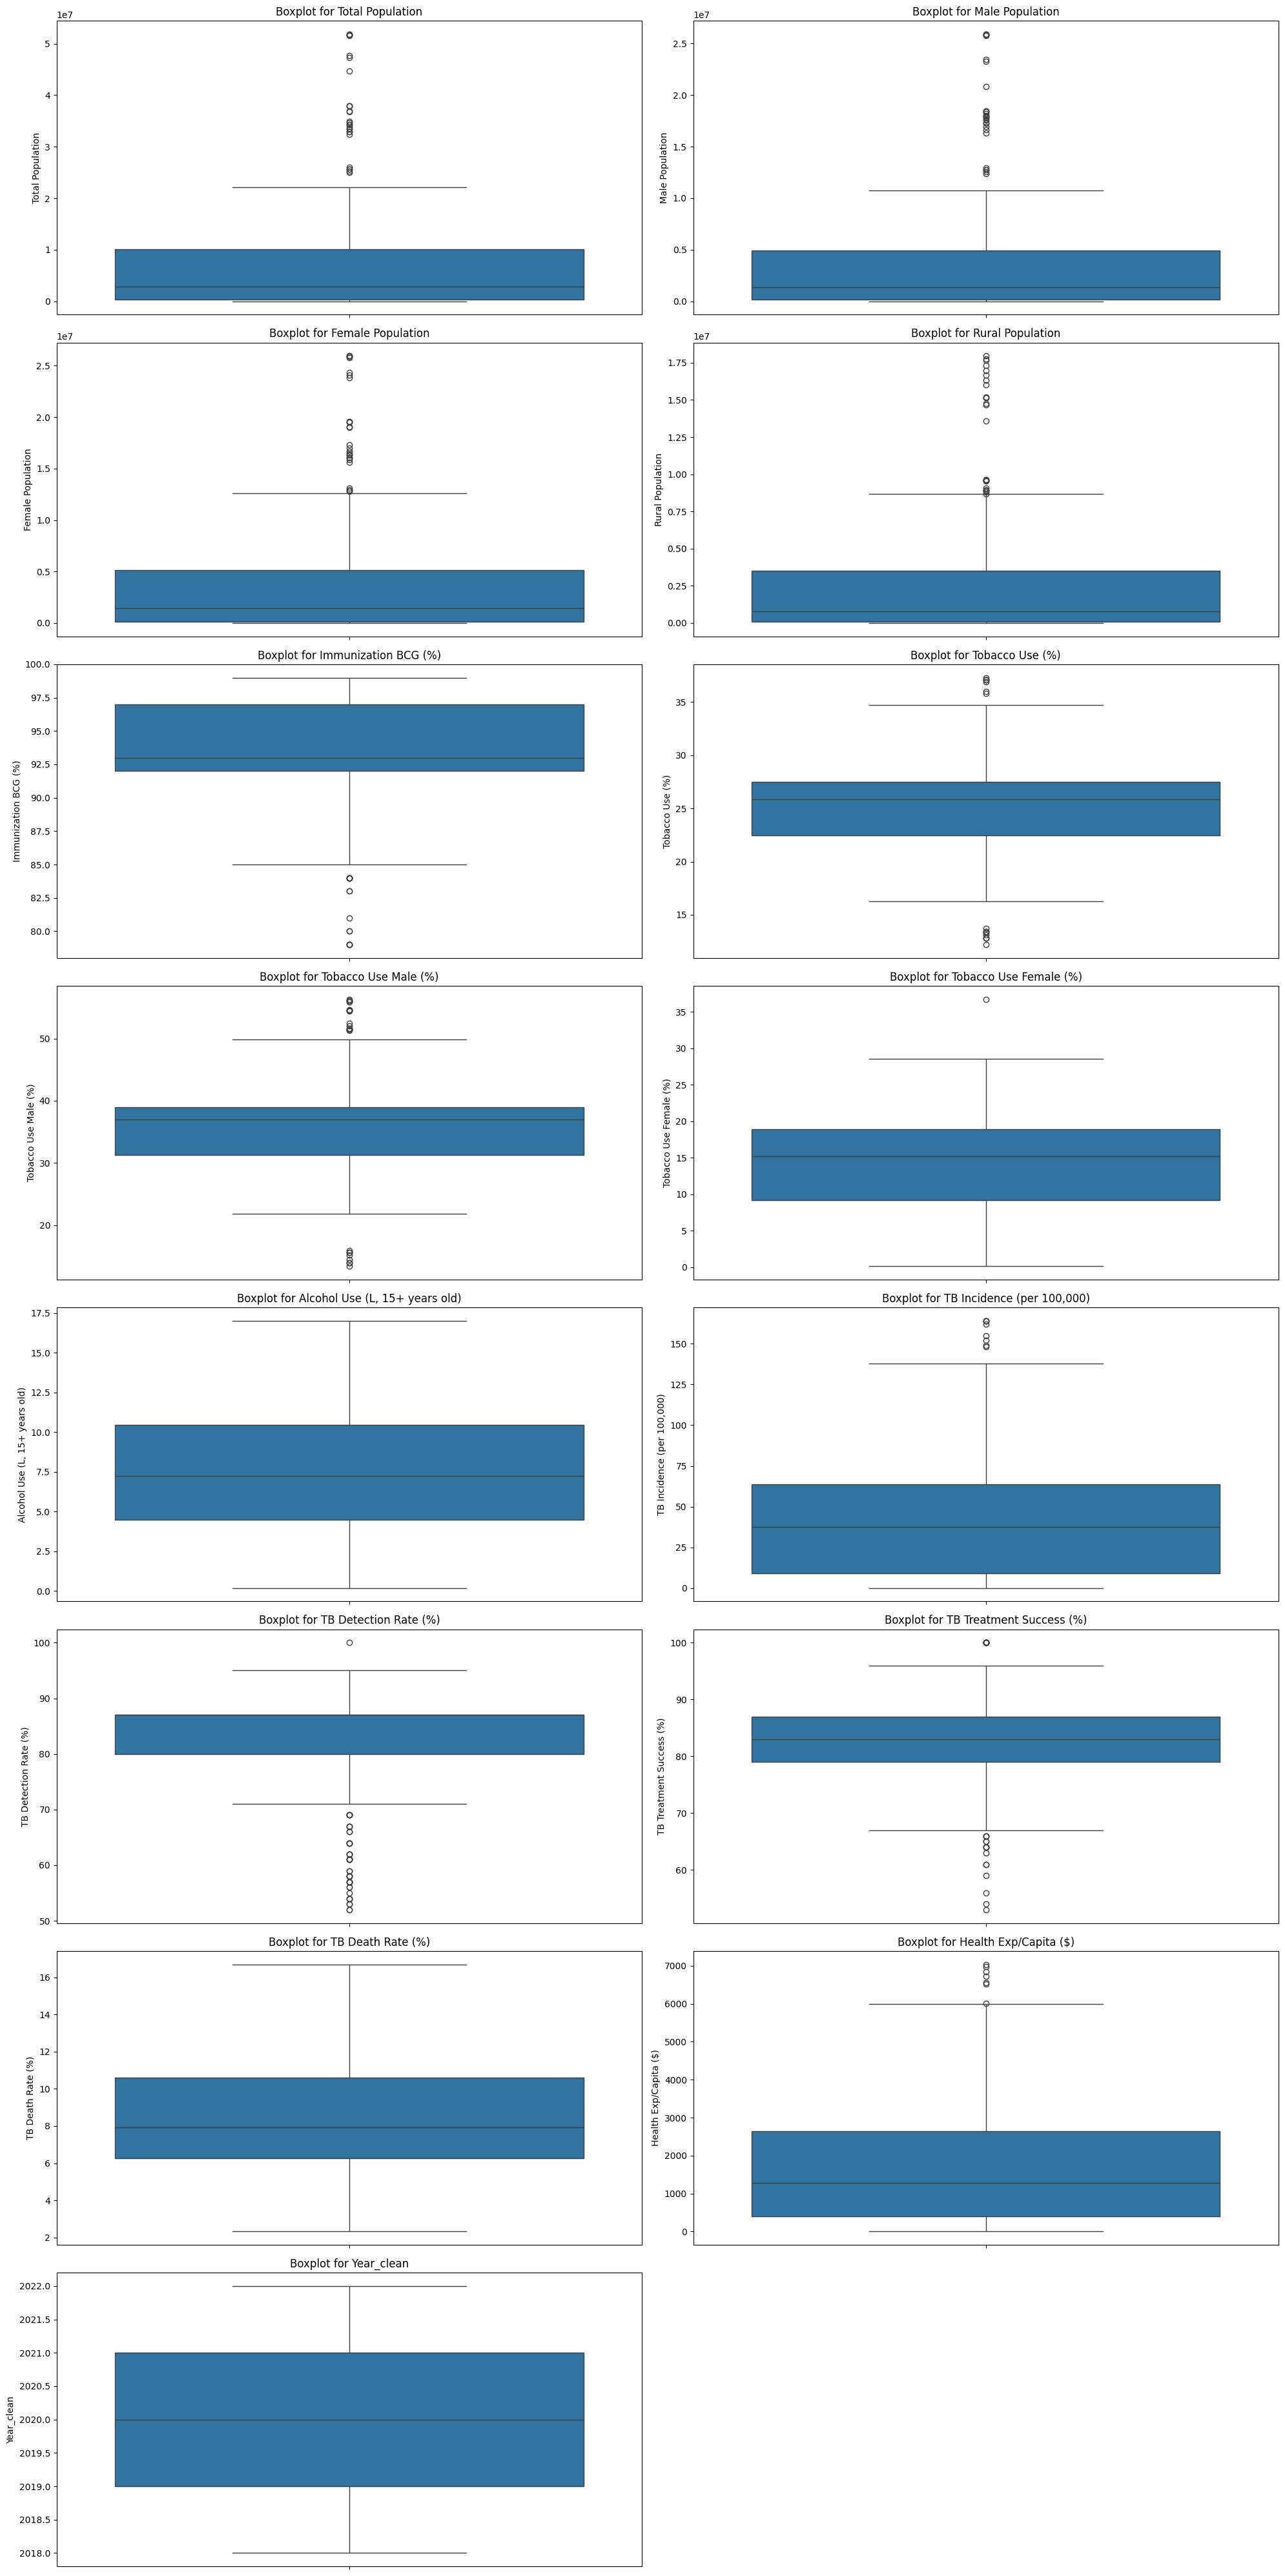

In [ ]:
# Remove outliers using IQR method
def remove_outliers(df):
    numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
    num_columns = len(numeric_columns)
    num_per_row = 2
    num_rows = -(-num_columns // num_per_row)

    # Track indices of all rows that are outliers in any column
    outlier_indices = set()

    for column in numeric_columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Find indices of outliers
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)].index
        outlier_indices.update(outliers)

    # Drop all outlier rows
    df = df.drop(index=outlier_indices)

    fig, axes = plt.subplots(num_rows, num_per_row, figsize=(20, 5 * num_rows))
    axes = axes.flatten()

    for i, column in enumerate(numeric_columns):
        sns.boxplot(y=df[column], ax=axes[i])
        axes[i].set_title(f'Boxplot for {column}')

    for j in range(i + 1, len(axes)):
        axes[j].set_visible(False)

    plt.tight_layout()
    plt.show()

    return df

df_no_outliers = remove_outliers(df)

### **4. Segmentation Analysis**

Segmentation analysis is done based on the pre-experimental questions.

In [ ]:
# Make a copy of dataframe for segmentation analysis
df_seg = df.copy()

#### **4.1 Parents: "Will my child’s risk of getting TB decrease if they receive the BCG immunization?"**

Hypothesis: The higher the immunization rate, the lower the incidence of TB.

The segmentation is done based on the median of the features.

1. *Compare median*

  The Low Immunization group has a much higher median TB incidence than the High Immunization group shows that rate of BCG immunization is directly proportional to the TB incidence.

2. *Compare spread of data*

  The Low Immunization group shows a wider spread of TB incidence shows that there is a significant difference between the minimum and maximum rates. This may be due to the presence of 0% immunization rates, where the record is incorrect or missing. Verification is needed to be done on this unreasonable values.

3. *Outliers*

  The Low Immunization group has an extremely high outlier, which is more than 1100 persons per 100,000 population. If the outlier is caused by some special incident, such as a disease outbreak, then it should be kept for further model training. However, if the outlier is not verified, then it should be removed to enhance the model's performance.

In general, TB incidence is more controlled and less variable when immunization rates are higher. **The hypothesis is accepted.**

***
**Insights**

The main factor leading to this conclusion is that BCG (Bacillus Calmette-Guérin) is a TB vaccine that is effective in protecting children and babies who are at particularly high risk of getting TB.


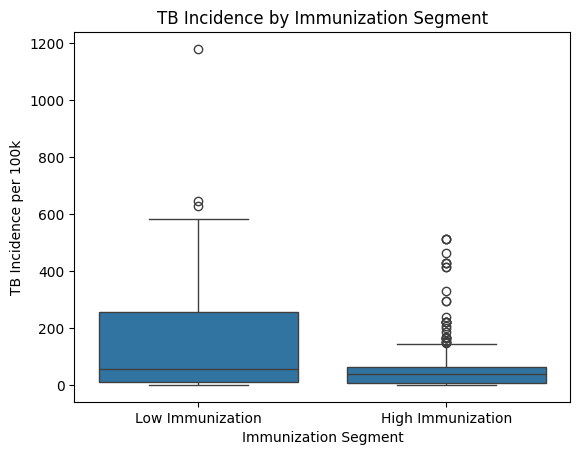

In [ ]:
# @title
# High vs Low Immunization
median_bcg = df_seg['Immunization BCG (%)'].median()
df_seg['Immunization Segment'] = np.where(
    df_seg['Immunization BCG (%)'] >= median_bcg,
    'High Immunization', 'Low Immunization'
)

sns.boxplot(data=df_seg, x='Immunization Segment', y='TB Incidence (per 100,000)')
plt.title('TB Incidence by Immunization Segment')
plt.ylabel('TB Incidence per 100k')
plt.xlabel('Immunization Segment')
plt.show()

#### **4.2 Public health officer: "Are rural populations at higher risk for TB?"**

Hypothesis: The larger the rural population, the higher the incidence of TB.

The segmentation of the rural population is done by comparing it to the total population of the country. If the rural population is greater than or equal to half of the total population, the country is considered rural dominant.

1. *Compare median*

  The Rural Dominant has a much higher median TB incidence than the Urban Dominant shows that rural areas has more TB cases.

2. *Compare spread of data*

  The Rural Dominant shows a wider spread of TB incidence shows that there is a significant difference between the minimum and maximum number of cases in rural areas. This may be due to smaller size of population. For example, in a smaller rural populations, a small number of TB cases can highly affect the incidence rate.

3. *Outliers*

  The Rural Dominant has an extremely high outlier, which is nearly 1200 persons per 100,000 population. Assuming that the data retrieved is correct, this outlier indicates that there is a specific region experiencing a serious localized TB outbreak.

In general, TB incidence is more common in rural areas. **The hypothesis is accepted.**

***
**Insights**

The real-world factors that lead to such a conclusion may be:

* limited healthcare access, which leads to delayed diagnosis
* poor TB awareness

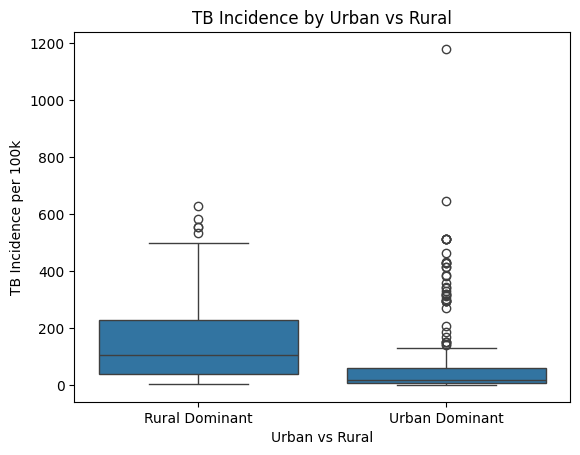

In [ ]:
# Urban vs Rural Dominance
df_seg['Urban vs Rural'] = np.where(
    df_seg['Rural Population'] >= (0.5 * df_seg['Total Population']),
    'Rural Dominant', 'Urban Dominant'
)

sns.boxplot(data=df_seg, x='Urban vs Rural', y='TB Incidence (per 100,000)')
plt.title('TB Incidence by Urban vs Rural')
plt.ylabel('TB Incidence per 100k')
plt.xlabel('Urban vs Rural')
plt.show()

#### **4.3 Ministry of Health: "Do areas with better TB management see lower TB incidence?"**

  Hypothesis: The stronger the TB management, the lower the TB incidence.

  The segmentation of the TB management is done by comparing the median of the rate of detection and treatment success. If both of the rates are greater than or equal to the global median, then it is considered to have strong TB management.

1. *Compare median*

  The Strong TB Management has smaller median TB incidence than the Weak TB Management shows that the TB management capabilities is directly proportional to the TB incidence.

2. *Compare spread of data*

  The Weak TB Management shows a wider spread of TB incidence shows that there is a significant difference between the minimum and maximum number of TB incidence. This may be caused by the unequal access to healthcare.

3. *Outliers*

  The Weak TB Management has an extremely high outlier, which is nearly 1200 persons per 100,000 population. Assuming that the data retrieved is correct, this outlier indicates that there is a specific region experiencing a serious localized TB outbreak.

In general, stronger TB management can decrease and standardized the TB incidence. **The hypothesis is accepted.**

***
**Insights**

The real-world factors that lead to such a conclusion may be:

* better health infrastructure
* strong data monitoring and reporting
* community education and awareness (campaigns)
* outbreaks preparedness

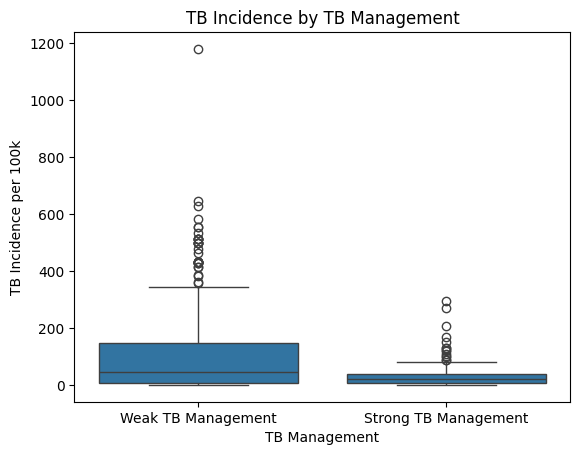

In [ ]:
# Strong vs Weak TB Case Management
# Define 'Strong' as both high detection and high treatment success
median_detect = df_seg['TB Detection Rate (%)'].median()
median_success = df_seg['TB Treatment Success (%)'].median()

df_seg['TB Management'] = np.where(
    (df_seg['TB Detection Rate (%)'] >= median_detect) &
    (df_seg['TB Treatment Success (%)'] >= median_success),
    'Strong TB Management', 'Weak TB Management'
)

sns.boxplot(data=df_seg, x='TB Management', y='TB Incidence (per 100,000)')
plt.title('TB Incidence by TB Management')
plt.ylabel('TB Incidence per 100k')
plt.xlabel('TB Management')
plt.show()

#### **4.4 Epidemiologist: "Do lifestyles such as consuming tobacco and alcohol affect the TB incidence rate"**

Hypothesis: The person who consumes tobacco and alcohol has a higher risk of getting TB.

The segmentation of the lifestyles such as consuming tobacco and alcohol is done by comparing them to the TB incidence rate. If the consumption of tobacco and alcohol is greater than or equal to half of the TB incidence rate, then lifestyles such as consuming tobacco and alcohol increase the risk of getting TB.


**- Tobacco Use Segmentation**

1. *Compare median*

  The High Tobacco Use group has a slightly higher median TB incidence than the Low Tobacco Use group. This suggests that tobacco use may be associated with increased TB risk, though the difference is not very large.

2. *Compare spread of data*

  Both Low and High Tobacco Use groups show a similar spread (IQR). This indicates a comparable range in the middle 50% of the data. However, the High Tobacco Use group shows a marginally higher upper quartile, which hinting at higher TB incidence in more extreme cases.

3. *Outliers*

  The High Tobacco Use group has more extreme outliers, including one above 1100 TB cases per 100,000 population. These high outliers are due to data incompleteness mentioned in statiscal analysis.

Overall, TB incidence appears to be slightly higher and more variable in populations with High Tobacco Use. **The hypothesis is partially supported for tobacco use.**

**- Alcohol Use Segmentation**

1. *Compare median*

  The Low Alcohol Use group has a much higher median TB incidence than the High Alcohol Use group. This result contradicts the hypothesis and suggests that alcohol use may not be directly associated with increased TB incidence.

2. *Compare spread of data*

  The Low Alcohol Use group shows a wider spread in TB incidence. This indicates more variation in cases. This could be influenced by regions with low alcohol consumption but high TB rates due to other factors such as poverty, poor healthcare access, or co-infections.

3. *Outliers*

  Both groups contain high outliers above 1100 TB cases per 100,000. These should be investigated with TB outbreaks or high-risk regions for potential data quality issues.

Surprisingly, the High Alcohol Use group has lower and more consistent TB incidence rates. This may reflect underlying confounding variables rather than a protective effect of alcohol. **The hypothesis is not supported for alcohol use.**

***
**Insights**

The real-world factors that lead to such a conclusion may be:

* Tobacco use damages the lungs and weakens the immune system, which leads to more TB incidence.
* Alcohol use does not show a direct link to higher TB incidence in this data.
* Countries with higher tabocco and alcohol consumption may also have better healthcare systems, which help control TB.
* Low tobacco and alcohol use are often seen in poorer countries, where TB rates are already high due to other reasons like poverty or weak health infrastructure.
* The differences in TB incidence may be influenced more by socioeconomic conditions than by tobacco and alcohol use alone.
* These patterns show the importance of considering confounding factors such as income, healthcare and lifestyle in the analysis.


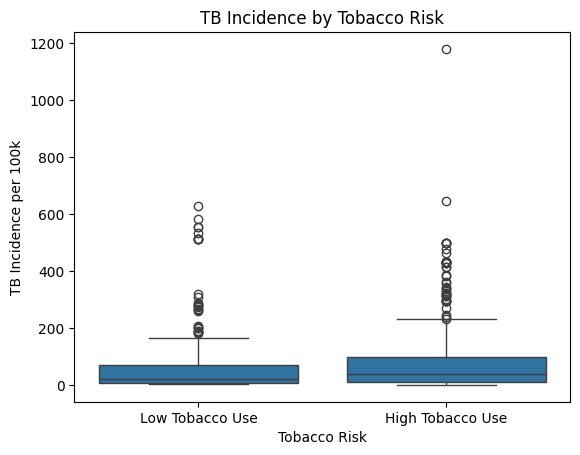

In [ ]:
# Tobacco Risk Profiles
median_tobacco = df_seg['Tobacco Use (%)'].median()
df_seg['Tobacco Risk'] = np.where(
    df_seg['Tobacco Use (%)'] >= median_tobacco,
    'High Tobacco Use', 'Low Tobacco Use'
)

sns.boxplot(data=df_seg, x='Tobacco Risk', y='TB Incidence (per 100,000)')
plt.title('TB Incidence by Tobacco Risk')
plt.ylabel('TB Incidence per 100k')
plt.xlabel('Tobacco Risk')
plt.show()

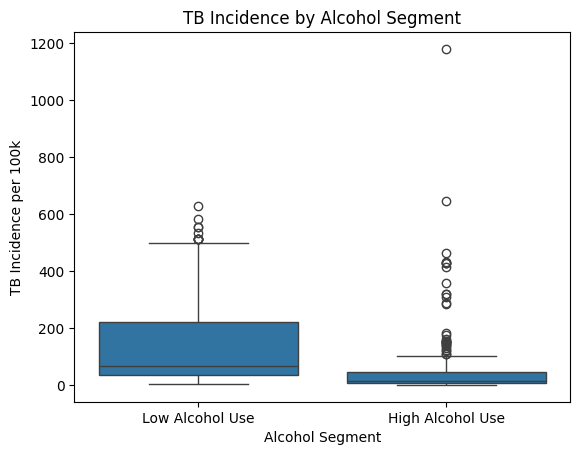

In [ ]:
# Alcohol Consumption Segments
median_alcohol = df_seg['Alcohol Use (L, 15+ years old)'].median()
df_seg['Alcohol Segment'] = np.where(
    df_seg['Alcohol Use (L, 15+ years old)'] >= median_alcohol,
    'High Alcohol Use', 'Low Alcohol Use'
)

sns.boxplot(data=df_seg, x='Alcohol Segment', y='TB Incidence (per 100,000)')
plt.title('TB Incidence by Alcohol Segment')
plt.ylabel('TB Incidence per 100k')
plt.xlabel('Alcohol Segment')
plt.show()

#### **4.5 NGO: "Which regions or demographic groups should we prioritize for TB awareness campaigns?"**

Hypothesis: The higher the population of a country, the higher the priority of having TB awareness campaigns.

  The segmentation of TB incidence is done by comparing the median of the incidence rates across different population size groups. If the median TB incidence is higher in one group compared to the other, it indicates a higher TB burden and suggests the need for prioritized awareness campaigns.

1. *Compare median*

  The High Population group has a higher median TB incidence than the Low Population group. This supports the hypothesis that countries with larger populations experience more TB cases per 100,000 people and may benefit more from targeted TB awareness campaigns

2. *Compare spread of data*

  The High Population group shows a wider spread of TB incidence, indicating more variability in TB rates within this segment. This suggests that while many high-population countries have high TB rates, some may be managing it better than others.

3. *Outliers*

  Both groups contain high outliers with the Low Population group including an outlier above 1100 per 100,000, and the High Population group with several cases above 600.  Assuming that the data retrieved is correct, this outlier indicates that there is a specific region experiencing a serious localized TB outbreak.

In general, countries with higher populations tend to have higher and more variable TB incidence rates. Prioritizing these regions for TB awareness campaigns could help reduce the TB burden more effectively. **The hypothesis is accepted.**

***
**Insights**

The real-world factors that lead to such a conclusion may be:

* High population density can lead to faster TB transmission
* Crowded living conditions in urban areas may increase person-to-person spread
* community education and awareness (campaigns)
* outbreaks preparedness

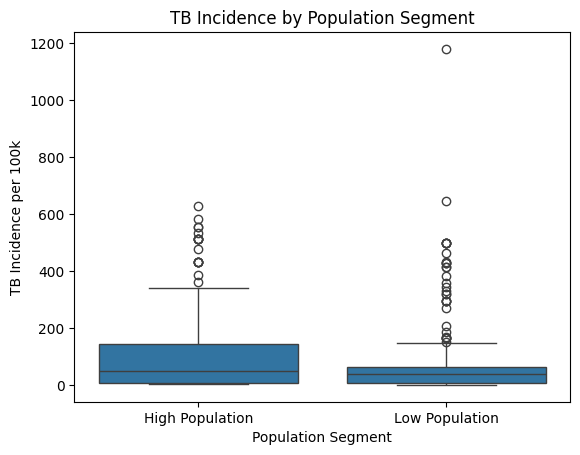

In [ ]:
# High vs Low Population
median_pop = df_seg['Total Population'].median()
df_seg['Population Segment'] = np.where(df_seg['Total Population'] >= median_pop, 'High Population', 'Low Population')

sns.boxplot(data=df_seg, x='Population Segment', y='TB Incidence (per 100,000)')
plt.title('TB Incidence by Population Segment')
plt.ylabel('TB Incidence per 100k')
plt.xlabel('Population Segment')
plt.show()

## **4. Machine Learning - Linear Regression**

Linear regression is suitable for predicting TB management because the data shows a linear trend, the problem involves a continuous target variable, and the model is interpretable, efficient, and easy to evaluate. It provides a strong foundation for both initial insights and further model refinement.


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
# Targets Feature
target = ['TB Detection Rate (%)','TB Treatment Success (%)', 'TB Death Rate (%)']

# Features (Model B: selected features)
features_pos = ['TB Incidence (per 100,000)', 'TB Detection Rate (%)',
         'TB Treatment Success (%)', 'TB Death Rate (%)', 'Health Exp/Capita ($)']

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Initialize encoder
encoder = OneHotEncoder(sparse_output=False)  # or sparse=False if you're using an older sklearn

# Fit-transform 'Country Name' and convert to DataFrame
df_encoded = encoder.fit_transform(df[['Country']])
df_encoded = pd.DataFrame(df_encoded, columns=encoder.get_feature_names_out(['Country']), index=df.index)

# Concatenate encoded data with original dataframe
df = pd.concat([df, df_encoded], axis=1)

# Drop original country info
df.drop(['Country'], axis=1, inplace=True)

# Confirm result
df.info()

# 2018 [TR2018] --> 2018
df['Year'] = df['Year'].str.extract(r'(\d{4})').astype(int)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 512 entries, 0 to 511
Columns: 119 entries, Year to Country_Viet Nam
dtypes: float64(115), int64(3), object(1)
memory usage: 476.1+ KB


In [ ]:
# Drop target columns from the features
X_a = df.drop([
    'TB Detection Rate (%)',
    'TB Treatment Success (%)',
    'TB Death Rate (%)'
    ], axis=1)

X_b = df[features_pos]
y = df[target]

Log Transformation ot normalize target variables

In [ ]:
# Check skewness to decide transformation
skewness = np.sign(np.mean((y - np.mean(y))**3))  # simple sign of skewness

# Option 1: Manual log transform for right-skewed data (target must be > 0)
if skewness > 0:
    y_transformed = np.log1p(y)  # log(1 + y) to handle zeros

# Option 2: Reflection + log for left-skewed data
elif skewness < 0:
    y_reflected = y.max() + 1 - y
    y_transformed = np.log1p(y_reflected)

else:
    # If approximately symmetric, no transform needed
    y_transformed = y

#### Model A – Using All Features

In [ ]:
# Train/Test Split
X_train_all, X_test_all, y_train, y_test = train_test_split(X_a, y_transformed, test_size=0.2, random_state=42)

# Linear Regression Model
lin_reg = LinearRegression()

# Model A
lin_reg.fit(X_train_all, y_train)
y_pred_all = lin_reg.predict(X_test_all)

# Evaluate Model A
print("=== Linear Regression - Model A (All Features) ===")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_all)))
print("MAE:", mean_absolute_error(y_test, y_pred_all))
print("R² Score:", r2_score(y_test, y_pred_all))

=== Linear Regression - Model A (All Features) ===
RMSE: 0.2392594180744959
MAE: 0.13842834542908797
R² Score: 0.774665132311787


#### Model B – Using Only Selected Features

In [ ]:
# Model B (Selected features)

# Train/Test Split for Model B
X_train_pos, X_test_pos, y_train_b, y_test_b = train_test_split(X_b, y_transformed, test_size=0.2, random_state=42)

# Model B
lin_reg_b = LinearRegression()
lin_reg_b.fit(X_train_pos, y_train_b)
y_pred_pos = lin_reg_b.predict(X_test_pos)

# Evaluate Model B
print("\n=== Linear Regression - Model B (Positively Correlated Features) ===")
print("RMSE:", np.sqrt(mean_squared_error(y_test_b, y_pred_pos)))
print("MAE:", mean_absolute_error(y_test_b, y_pred_pos))
print("R² Score:", r2_score(y_test_b, y_pred_pos))



=== Linear Regression - Model B (Positively Correlated Features) ===
RMSE: 0.2596133359190761
MAE: 0.12870823034030093
R² Score: 0.8079510168612041


#### Model Comparison

1. Model Accuracy (Closeness to Red Line)
  *   Model B is consistently closer to the red line (y = x) than Model A across both TB management.
  *   This indicates that Model B’s predictions are more accurate and consistent with actual values.

2. Spread and Deviation
  *   Model A shows wider dispersion from the red line, especially at lower actual values. This means more prediction errors.
  *   Model B has less deviation, suggesting better generalization and lower prediction error variance.

3. Outliers Handling
  *   Both models have some outliers, but Model B still tracks them more closely.
  *   Model A occasionally underestimates or overestimates, particularly at extremes.

***
**Conclusion**

Model B outperforms Model A in predicting both TB Detection Rate and TB Treatment Success.

Therefore, **Model B** is more suitable for TB management modeling and forecasting.





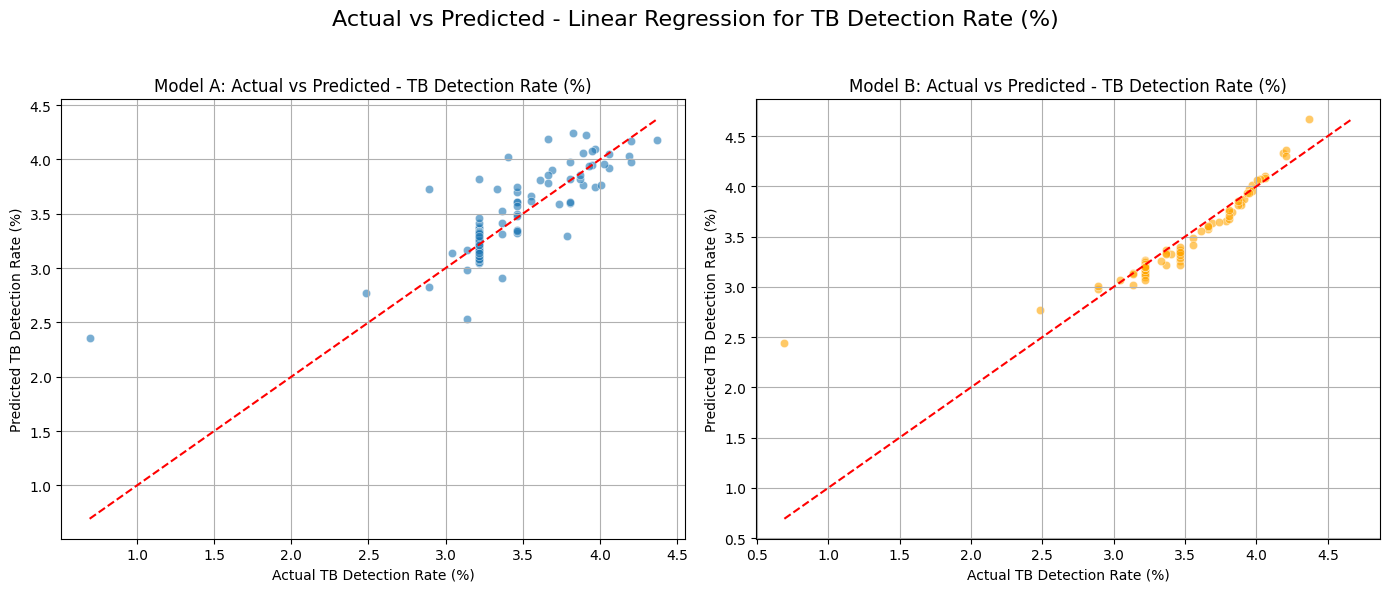

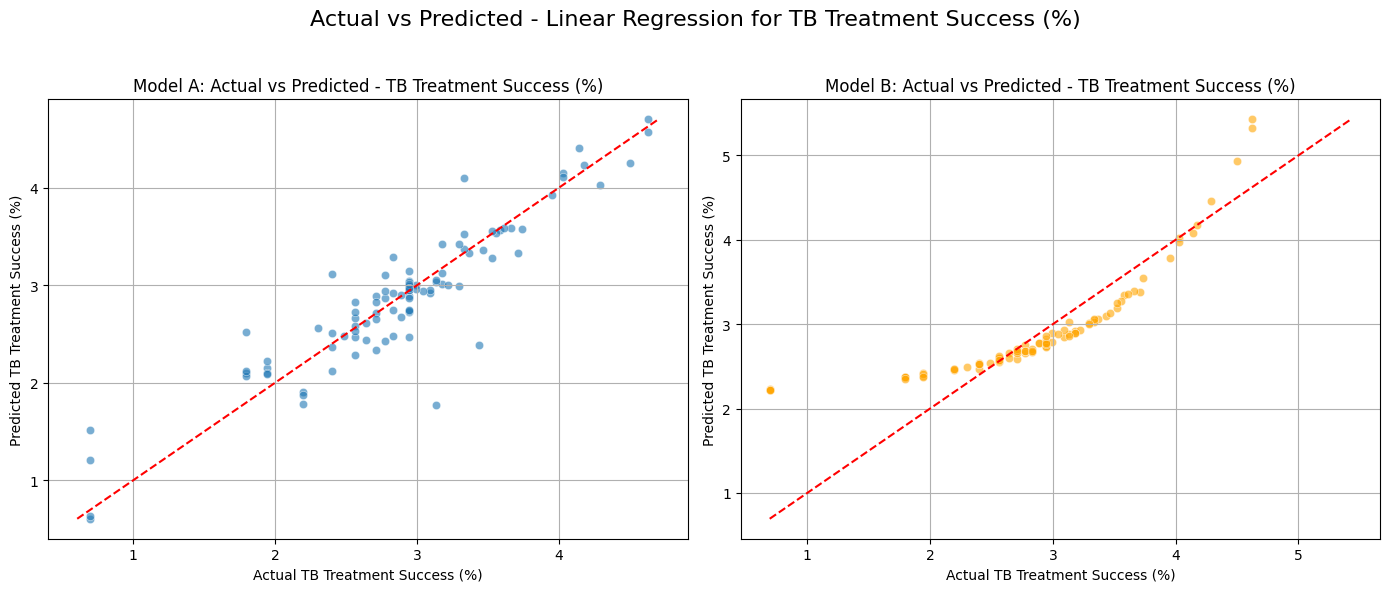

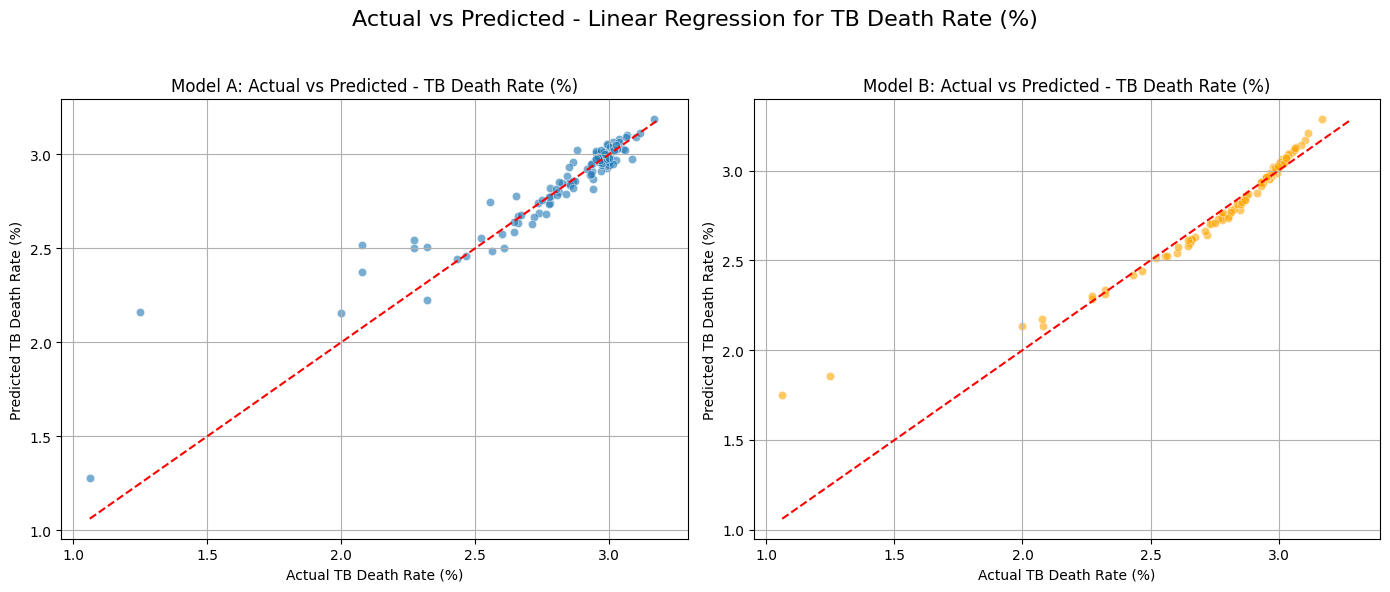

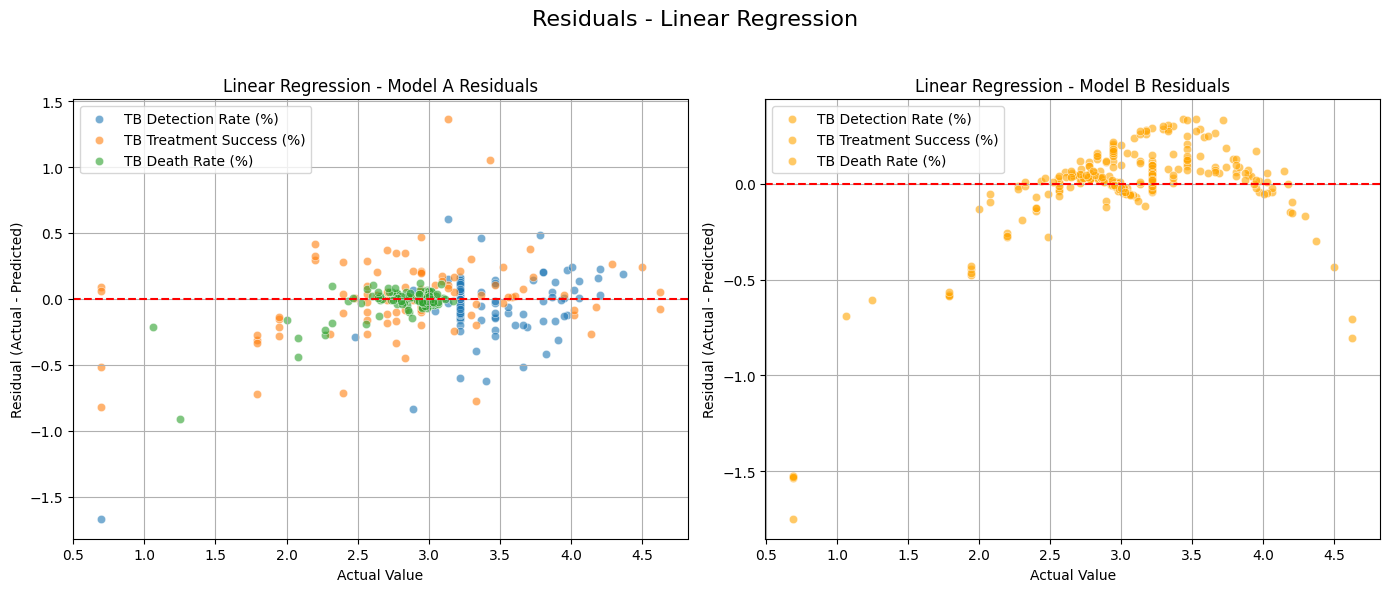

In [ ]:
# Plotting Actual vs Predicted for Linear Regression - Model A and Model B
# Iterate through each target variable
for i, target_name in enumerate(target):
    plt.figure(figsize=(14, 6)) # Create a new figure for each target

    # Model A: Actual vs Predicted for the current target
    plt.subplot(1, 2, 1) # Use a 1x2 grid for each target's figure

    y_test_np = y_test.to_numpy() if isinstance(y_test, pd.DataFrame) else y_test
    y_test_b_np = y_test_b.to_numpy() if isinstance(y_test_b, pd.DataFrame) else y_test_b

    # Use the NumPy array version for plotting
    sns.scatterplot(x=y_test_np[:, i], y=y_pred_all[:, i], alpha=0.6) # Plot the i-th column
    # Plot the perfect prediction line (y=x)
    min_val = min(y_test_np[:, i].min(), y_pred_all[:, i].min())
    max_val = max(y_test_np[:, i].max(), y_pred_all[:, i].max())
    plt.plot([min_val, max_val], [min_val, max_val], '--r')
    plt.xlabel(f"Actual {target_name}")
    plt.ylabel(f"Predicted {target_name}")
    plt.title(f"Model A: Actual vs Predicted - {target_name}")
    plt.grid(True)

    # Model B: Actual vs Predicted for the current target
    plt.subplot(1, 2, 2) # Plot next to Model A for the same target
    # Use the NumPy array version for plotting
    sns.scatterplot(x=y_test_b_np[:, i], y=y_pred_pos[:, i], alpha=0.6, color='orange') # Plot the i-th column
    # Plot the perfect prediction line (y=x)
    min_val = min(y_test_b_np[:, i].min(), y_pred_pos[:, i].min())
    max_val = max(y_test_b_np[:, i].max(), y_pred_pos[:, i].max())
    plt.plot([min_val, max_val], [min_val, max_val], '--r')
    plt.xlabel(f"Actual {target_name}")
    plt.ylabel(f"Predicted {target_name}")
    plt.title(f"Model B: Actual vs Predicted - {target_name}")
    plt.grid(True)

    plt.suptitle(f"Actual vs Predicted - Linear Regression for {target_name}", fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

# Plotting Residuals for Linear Regression - Model A and Model B
plt.figure(figsize=(14, 6))

# Model A Residual Plot
residuals_all = y_test_np - y_pred_all # Calculate residuals using NumPy arrays
plt.subplot(1, 2, 1)
# Plot each residual against the corresponding actual value from the NumPy array
for i, target_name in enumerate(target):
    sns.scatterplot(x=y_test_np[:, i], y=residuals_all[:, i], alpha=0.6, label=target_name)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Actual Value") # More general label since plotting multiple targets
plt.ylabel("Residual (Actual - Predicted)")
plt.title("Linear Regression - Model A Residuals")
plt.legend() # Add a legend to distinguish targets
plt.grid(True)


# Model B Residual Plot
# y_test_b is already a NumPy array
residuals_pos = y_test_b_np - y_pred_pos # Calculate residuals using NumPy arrays
plt.subplot(1, 2, 2)
# Plot each residual against the corresponding actual value from the NumPy array
for i, target_name in enumerate(target):
    sns.scatterplot(x=y_test_b_np[:, i], y=residuals_pos[:, i], alpha=0.6, color='orange', label=target_name)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Actual Value") # More general label
plt.ylabel("Residual (Actual - Predicted)")
plt.title("Linear Regression - Model B Residuals")
plt.legend() # Add a legend
plt.grid(True)


plt.suptitle("Residuals - Linear Regression", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

## **5. Insights and Recommendations**

##### **5.1 Key Insights and Observations**

*Most of the insights has been provided in the EDA section.
 Below are some additional insights:*

**1. Outliers and Anomalies**
 * Outliers exist across multiple features:
  * TB incidence > 1100 per 100,000, especially in low-immunization and low-management countries.
  * 0% BCG immunization likely indicates missing data.
  * 100% treatment success rates are unrealistic and require validation.

**2. Population Feature Multicollinearity**
 * Features like total population, male population, female population, and rural population are highly correlated (r ≈ 1), which can cause multicollinearity in modeling if not addressed (e.g., through dimensionality reduction).

**3. Model Performance**
 * Model B demonstrates higher prediction accuracy, less variance, and better outlier tracking than Model A for TB detection and treatment success.
 * Model B is more suitable for forecasting and public health planning.

##### **5.2 Recommendations**

**1. Improve Data Quality and Consistency**
* Standardize missing value treatment: Use advanced imputation methods (e.g., KNN, MICE) instead of median-filling for features with >50% missing data (like tobacco and alcohol use).
* Validate anomalies: Investigate extreme values such as 0% immunization or 100% treatment success to distinguish between genuine outliers and data entry errors.
* Get more years or countries to have more accurate data on tobacco use and alcohol consumption
* Population recorded based on age group can be added to observe the relationship between age and the rate of TB management (incidence, treatment success, death).
* To enhance the data specificity, the country can be selected based on regions by considering the living styles, culture, weather, and environment.
* Ensure unit and scale consistency across countries and years to prevent bias in model training.

**2. Address Multicollinearity**
*  Apply dimensionality reduction techniques such as PCA or remove redundant variables (e.g., male/female population when total is included) to avoid collinearity that may distort model coefficients.

**3. Enhance Modeling Strategy**
*  Segment data by region or income group before modeling, as different patterns may exist across demographic clusters.
*  Test both linear and non-linear models (e.g., random forest, gradient boosting) to better capture complex relationships in health determinants.
*  Evaluate model robustness using cross-validation, especially given class imbalance and potential data noise.

**4. Correlation Hypotheses for Further Analysis**

  In addition to the hypotheses that have been proposed, there are some hypotheses that can be verified by further analyzing the TB dataset to further validate the hypothesis and gain meaningful information. The following are hypotheses that may require further analysis:
  
* Hypothesis: Higher tobacco use in  male population correlates with increased TB incidence, but this link might be strong in some countries and weak in others.
* Hypothesis: When BCG vaccination coverage is already very high (above 95%), further increases may not significantly reduce TB incidence.
* Hypothesis: Treatment success rate is influenced more by healthcare system efficiency than by raw expenditure in exploring healthcare infrastructure proxies.

**5. Data Infrastructure and Scalability**
* Store raw and processed datasets separately to allow reproducibility and auditing.
* Automate ETL pipelines for annual data updates from the World Bank to ensure consistent data refresh.
* Implement data version control (e.g., using DVC or Git-LFS) for tracking changes across modeling experiments.



##### **5.3 Limitations**

*   **Data Incompleteness:** Key features like tobacco and alcohol use have over 50% missing values. These were filled using median imputation, which may reduce accuracy and introduce bias.
    * **Future works:** Use advanced imputation methods like KNN or MICE and enrich missing data using external real sources such as WHO datasets.

*   **Outlier Sensitivity:** Some extreme values may represent actual health crises such as disease outbreaks, while others maybe due to reporting errors. These must be verified before modeling.
    * **Future works:** Detect and tag outliers, validate them with domain context and use robust models less sensitive to extreme values.    

*   **Cross-sectional Nature:** The analysis does not account for time-lagged effects. For instances, the whole world was impacted by the pandemic Covid-19 during the year 2019 ~ 2020 which limiting the causal inference.
    * **Future works:** Add time-based features or convert the data to a panel format to better capture trends and time-lagged effects.

*   **Cultural and Socioeconomic Confounding:** Factors like religion, income, and healthcare policy are not fully captured in the dataset but significantly influence TB outcomes.
    * **Future works:** Integrate external socioeconomic indicators or use proxy variables like region and development index to account for hidden influences.

*  **Modeling Assumptions:** Linear relationships assumed in modeling may oversimplify complex epidemiological interactions, and multicollinearity in population variables may affect model interpretability.
    * **Future works:** Use non-linear models or apply feature reduction techniques like PCA to handle multicollinearity and complex interactions.















# **6. Conclusion**
This project analyzed global tuberculosis (TB) data from 2018 to 2022 to evaluate key factors influencing TB incidence and control. The study tested several pre-defined hypotheses, with the following findings:

**1. Hypothesis: Higher immunization coverage leads to better control and stability of TB incidence.**   
   
Supported. Countries with higher immunization rates showed lower TB incidence and smaller year-to-year variation, confirming the protective effect of vaccination programs

**2. Hypothesis: TB incidence is higher in rural areas.**
Supported. The data showed that TB rates tend to be higher in rural regions, underscoring the need for more health resources and screening programs in underserved areas.

**3. Hypothesis: Stronger TB management policies reduce and stabilize TB incidence.**

Supported. Countries that implemented national TB control strategies showed a notable decline in incidence rates, proving the effectiveness of public health governance.

**4. Hypothesis: TB incidence is higher and more variable among populations with high tobacco and alcohol use.**

Partially supported.

* Among high-tobacco-use populations, TB incidence was slightly higher and more variable, lending partial support to the hypothesis.

* However, in high-alcohol-consumption populations, TB incidence was unexpectedly lower and more stable. This is likely due to confounding variables (e.g., economic status, healthcare access), rather than a protective effect of alcohol. Hence, this hypothesis was not supported for alcohol.

**5. Hypothesis: Countries with larger populations have higher and more variable TB incidence.**
Supported. TB burden tends to be greater in high-population countries, both in terms of incidence and regional variability, suggesting the need for prioritizing TB education and control campaigns in these regions.

### **Recommendations Based on Findings:**

* Expand vaccination programs in countries with low immunization coverage.

* Strengthen TB prevention and treatment infrastructure in rural and high-risk areas.

* Prioritize public education and early screening in populous nations to improve outreach.

* Integrate anti-tobacco measures with TB control strategies in high-smoking countries.

* Avoid drawing conclusions based on alcohol consumption due to potential confounding effects.

Overall, this study confirms that TB control is strongly influenced by structural health factors, lifestyle risks, and national policy efforts. It highlights the importance of data-driven planning in global health initiatives and offers strategic guidance for targeted interventions.